In [1]:
# import all libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# from sklearn.cluster import DBSCAN

In [2]:
pwd

'C:\\Users\\Ellahhh\\Documents\\Folders\\400_Level\\FinalYearProject\\Implementation'

<h2>Load the dataset</h2>

In [3]:
rawData = pd.read_excel('DataSet/geoPoll.xlsx')

In [4]:
rawData.head()

Gender.Weights  Age Group.Weights  ADM1.Weights  Total Weights Survey Date  \
0        0.921659           1.090933      1.034665       1.040323  2020-04-02   
1        0.921659           0.894454      1.029298       0.848534  2020-04-02   
2        0.970297           1.034483      0.800000       0.803004  2020-04-02   
3        0.921659           0.894454      0.994802       0.820096  2020-04-02   
4        0.921659           1.090933      0.975088       0.980420  2020-04-02   

   Country Gender Age Group       Admin1 SEC  ...  \
0    Kenya   Male     15-25     Machakos   B  ...   
1    Kenya   Male     26-35  Uasin Gishu  C1  ...   
2  Nigeria   Male     15-25        Benue   A  ...   
3    Kenya   Male     26-35        Kisii  C1  ...   
4    Kenya   Male     15-25        Nandi   B  ...   

   InformationSources: Friends/family  \
0                               False   
1                               False   
2                               False   
3                               False   
4                               False   

   InformationSources: Government messages InformationSources: Newspapers  \
0                                     True                          False   
1                                     True                          False   
2                                    False                          False   
3                                     True                           True   
4                                    False                          False   

  InformationSources: Other InformationSources: Radio  \
0                     False                     False   
1                     False                     False   
2                     False                     False   
3                     False                      True   
4                     False                     False   

   InformationSources: Social Media InformationSources: TV  \
0                             False                  False   
1                              True                   True   
2                              True                  False   
3                              True                   True   
4                              True                  False   

            SocialMedia MediaConsumption  \
0                   NaN   Consuming more   
1         Media outlets   Consuming more   
2  Health organizations   Consuming more   
3  Health organizations   Consuming more   
4         Media outlets   Consuming less   

                                        StayPositive  
0                                            Nothing  
1                                               Hope  
2                        Will go back to school soon  
3  the covid 19 outbreak has not been confirmed i...  
4  talking to peaple and watching movies  playing...  

[5 rows x 62 columns]

In [5]:
# to get the shape of the dataset
rawData.shape

(3988, 62)

In [6]:
# get information from the ReadAdultData
print('Information from the rawData\n')
rawData.info()

Information from the rawData

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3988 entries, 0 to 3987
Data columns (total 62 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Gender.Weights                                   3988 non-null   float64       
 1   Age Group.Weights                                3988 non-null   float64       
 2   ADM1.Weights                                     3988 non-null   float64       
 3   Total Weights                                    3988 non-null   float64       
 4   Survey Date                                      3988 non-null   datetime64[ns]
 5   Country                                          3988 non-null   object        
 6   Gender                                           3988 non-null   object        
 7   Age Group                                        3988 non-null   object        
 8   Admin1  

<h2>To check if the dataset needs to be Preprocessed</h2>

In [7]:
# to detect if there are missing values and sum up the missing values.
rawData.isnull().sum()

Gender.Weights                         0
Age Group.Weights                      0
ADM1.Weights                           0
Total Weights                          0
Survey Date                            0
                                    ... 
InformationSources: Social Media       0
InformationSources: TV                 0
SocialMedia                         2364
MediaConsumption                       0
StayPositive                        1989
Length: 62, dtype: int64

<h2>To check for missing values</h2>

In [8]:
def missing_values_table(rawData):
        # Total missing values
        mis_rawData = rawData.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * rawData.isnull().sum() / len(rawData)
        
        # Make a table with the results
        mis_val_table = pd.concat([ mis_rawData , mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(rawData.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missingValues = missing_values_table(rawData)
print(missingValues)

Your selected dataframe has 62 columns.
There are 5 columns that have missing values.
                  Missing Values  % of Total Values
SocialMedia                 2364               59.3
StayPositive                1989               49.9
BiggestChallenge            1988               49.8
FoodLocations2              1927               48.3
BrandPurchase                808               20.3


<h3>The above code shows that there are missing values in some columns</h3>
<br>

In [9]:
# create a count column to later check for outliers
rawData['count'] = rawData.index

<h3>Check for mismatched data type</h3>

In [ ]:
n = 0
colNo = 0 
while colNo < len(rawData.columns):
    print(rawData.columns[colNo])
    print("-----------------------------------------------------------------------------")
    for (rowName, data) in rawData.iterrows():
        if type(data[n]) == float:
            print(str(True) + ", This value has a data type of float: " + str(data[n]))
        elif type(data[n]) == str:
            print(str(True) + ", This value has a data type of string: " + str(data[n]))
        elif type(data[n]) == bool:
            print(str(True) + ", This value has a data type of boolean: " + str(data[n]))
        elif type(data[n]) == int:
            print(str(True) + ", This value has a data type of integer: " + str(data[n]))
        else:
            print("This value has a data type that does not exist: " + str(data[n]))
    n = n + 1
    print("------------------------------------------------------------------------------\n\n")
    colNo = colNo + 1

Gender.Weights
-----------------------------------------------------------------------------
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 0.9702970297029703
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 1.0928961748633879
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 1.0303030303030303
True, This value has a data type of flo

True, This value has a data type of float: 1.4184397163120568
True, This value has a data type of float: 0.937966976744186
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 0.9702970297029703
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 0.7722007722007722
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0303030303030303
True, This value has a data type of float: 1.4184397163120568
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.4184397163120568
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.7722007722007722
True, This value has a data type of float: 1.4184397163120568
True, This value has a data type of float: 1.0303030303030303
True, This value has a

True, This value has a data type of float: 1.0928961748633879
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.4184397163120568
True, This value has a data type of float: 0.9702970297029703
True, This value has a data type of float: 1.0303030303030303
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0928961748633879
True, This value has a data type of float: 1.0303030303030303
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0303030303030303
True, This value has a data type of float: 0.7722007722007722
True, This value has a data type of float: 1.4184397163120568
True, This value has a data type of float: 0.9702970297029703
True, This value has a data type of float: 0.7722007722007722
True, This value has a data type of float: 1.0928961748633879
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0303030303030303
True, 

True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.1049723756906078
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.9132420091324202
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.9132420091324202
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.9132420091324202
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.9132420091324202
True, This value has a data type of float: 0.7722007722007722
True, This value has a data type of float: 0.9132420091324202
True

True, This value has a data type of float: 0.7722007722007722
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.7722007722007722
True, This value has a data type of float: 1.1049723756906078
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 0.9702970297029703
True, This value has a data type of float: 0.9132420091324202
True, This value has a data type of float: 0.9132420091324202
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0928961748633879
True, This value has a data type of float: 0.9132420091324202
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.1049723756906078
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.1049723756906078
True, This value has 

True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This va

True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0928961748633879
True, This value has a data type of float: 0.7722007722007722
True, This value has a data type of float: 1.0928961748633879
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0928961748633879
True, This value has a data type of float: 0.7722007722007722
True, This value has a data type of float: 0.7722007722007722
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.937966976744186
True, This value has a data type of float: 1.0
True, This value has

True, This value has a data type of float: 1.0303030303030303
True, This value has a data type of float: 1.0303030303030303
True, This value has a data type of float: 0.9702970297029703
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0303030303030303
True, This value has a data type of float: 0.9702970297029703
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.9702970297029703
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0303030303030303
True, This value has a data type of float: 1.0303030303030303
True, This value has a data type of float: 1.0303030303030303
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.9702970297029703
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.970297

True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This va

True, This value has a data type of float: 0.7607843137254902
True, This value has a data type of float: 1.4586466165413534
True, This value has a data type of float: 0.7607843137254902
True, This value has a data type of float: 0.7607843137254902
True, This value has a data type of float: 0.7607843137254902
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.7607843137254902
True, This value has a data type of float: 0.7607843137254902
True, This value has a data type of float: 0.7607843137254902
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.7607843137254902
True, This value has a data type of float: 0.7607843137254902
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.4586466165413534
True, This value has a data type of float: 0.7607843137254902
True, This value has a data type of float: 1.4586466165413534
True, 

True, This value has a data type of float: 0.7607843137254902
True, This value has a data type of float: 1.4586466165413534
True, This value has a data type of float: 1.4586466165413534
True, This value has a data type of float: 0.7607843137254902
True, This value has a data type of float: 0.7607843137254902
True, This value has a data type of float: 0.7607843137254902
True, This value has a data type of float: 0.7607843137254902
True, This value has a data type of float: 0.7607843137254902
True, This value has a data type of float: 0.7607843137254902
True, This value has a data type of float: 0.7607843137254902
True, This value has a data type of float: 1.4586466165413534
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.4586466165413534
True, This value has a data type of float: 1.4586466165413534
True, This value has a data type of float: 0.937966976744186
True, This value has a data type of float: 0.7607843137254902
True, This value has a d

True, This value has a data type of float: 0.8944537815126051
True, This value has a data type of float: 0.9917557251908395
True, This value has a data type of float: 1.0909333333333333
True, This value has a data type of float: 0.8944537815126051
True, This value has a data type of float: 0.8944537815126051
True, This value has a data type of float: 1.0909333333333333
True, This value has a data type of float: 0.9333333333333332
True, This value has a data type of float: 1.0909333333333333
True, This value has a data type of float: 0.8944537815126051
True, This value has a data type of float: 0.8944537815126051
True, This value has a data type of float: 0.8944537815126051
True, This value has a data type of float: 1.0909333333333333
True, This value has a data type of float: 0.8944537815126051
True, This value has a data type of float: 0.9333333333333332
True, This value has a data type of float: 0.9333333333333332
True, This value has a data type of float: 1.0909333333333333
True, Th

True, This value has a data type of float: 0.8869030864197531
True, This value has a data type of float: 0.8421
True, This value has a data type of float: 0.8869030864197531
True, This value has a data type of float: 0.8869030864197531
True, This value has a data type of float: 0.9569590643274855
True, This value has a data type of float: 0.6867096774193548
True, This value has a data type of float: 0.9569590643274855
True, This value has a data type of float: 0.6867096774193548
True, This value has a data type of float: 0.8421
True, This value has a data type of float: 0.9569590643274855
True, This value has a data type of float: 0.9569590643274855
True, This value has a data type of float: 0.6867096774193548
True, This value has a data type of float: 0.8421
True, This value has a data type of float: 1.7556756756756755
True, This value has a data type of float: 0.9569590643274855
True, This value has a data type of float: 0.8421
True, This value has a data type of float: 1.0
True, Thi

True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.9333333333333332
True, This value has a data type of float: 1.044776119402985
True, This value has a data type of float: 1.044776119402985
True, This value has a data type of float: 1.0909333333333333
True, This value has a data type of float: 0.8944537815126051
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0909333333333333
True, This value has a data type of float: 1.0909333333333333
True, This value has a data type of float: 0.8944537815126051
True, This value has a data type of float: 0.8944537815126051
True, This value has a data type of float: 0.8944537815126051
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.8944537815126051
True, This value has a data type of float: 0.8944537815126051
True, This value has a data type of float: 0.8944537815126051
True, This value has a data type of float: 1.0
True, Th

True, This value has a data type of float: 1.0075187969924813
True, This value has a data type of float: 0.6190476190476191
True, This value has a data type of float: 1.6363636363636365
True, This value has a data type of float: 1.0075187969924813
True, This value has a data type of float: 0.6867096774193548
True, This value has a data type of float: 0.6190476190476191
True, This value has a data type of float: 1.0344827586206897
True, This value has a data type of float: 0.9569590643274855
True, This value has a data type of float: 1.0075187969924813
True, This value has a data type of float: 0.6867096774193548
True, This value has a data type of float: 1.0909333333333333
True, This value has a data type of float: 1.0909333333333333
True, This value has a data type of float: 0.9333333333333332
True, This value has a data type of float: 0.9569590643274855
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of fl

True, This value has a data type of float: 1.044776119402985
True, This value has a data type of float: 1.6363636363636365
True, This value has a data type of float: 0.6190476190476191
True, This value has a data type of float: 0.8944537815126051
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.6190476190476191
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.6363636363636365
True, This value has a data type of float: 1.0909333333333333
True, This value has a data type of float: 1.6363636363636365
True, This value has a data type of float: 0.6190476190476191
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0075187969924813
True, This value has a data type of float: 1.0075187969924813
True, This value has a data type of float: 0.6190476190476191
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.6363636363636365
True, T

True, This value has a data type of float: 0.8869030864197531
True, This value has a data type of float: 0.8421
True, This value has a data type of float: 0.6867096774193548
True, This value has a data type of float: 0.9569590643274855
True, This value has a data type of float: 1.3054041322314047
True, This value has a data type of float: 0.8869030864197531
True, This value has a data type of float: 0.9569590643274855
True, This value has a data type of float: 0.9569590643274855
True, This value has a data type of float: 0.8421
True, This value has a data type of float: 0.8421
True, This value has a data type of float: 0.9569590643274855
True, This value has a data type of float: 0.8869030864197531
True, This value has a data type of float: 0.6867096774193548
True, This value has a data type of float: 0.8421
True, This value has a data type of float: 0.8869030864197531
True, This value has a data type of float: 0.8421
True, This value has a data type of float: 0.8869030864197531
True, 

True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.6867096774193548
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.6190476190476191
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.8869030864197531
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This valu

True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.6190476190476191
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.3054041322314047
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.6190476190476191
True, This value has a data type of float: 0.6190476190476191
True, This value has a data type of float: 1.0075187969924813
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0075187969924813
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.3054041322314047
True, This value has a data type of float: 1.6363636363636365
True, This value has a data type o

True, This value has a data type of float: 0.7682119205298013
True, This value has a data type of float: 1.853658536585366
True, This value has a data type of float: 0.7682119205298013
True, This value has a data type of float: 1.3054041322314047
True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of float: 0.7682119205298013
True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.7682119205298013
True, This value has a data type of float: 0.7682119205298013
True, This value has a data type of float: 1.853658536585366
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.7682119205298013
True, This value has a data type of float: 0.7682119205298013
True, This value has a data type of float: 0.7682119205298013
True, This value has a data type of floa

True, This value has a data type of float: 1.3054041322314047
True, This value has a data type of float: 1.3054041322314047
True, This value has a data type of float: 1.3054041322314047
True, This value has a data type of float: 1.3054041322314047
True, This value has a data type of float: 1.3054041322314047
True, This value has a data type of float: 1.3054041322314047
True, This value has a data type of float: 1.3054041322314047
True, This value has a data type of float: 1.0478832116788321
True, This value has a data type of float: 1.3054041322314047
True, This value has a data type of float: 1.0478832116788321
True, This value has a data type of float: 1.3054041322314047
True, This value has a data type of float: 1.3054041322314047
True, This value has a data type of float: 1.3054041322314047
True, This value has a data type of float: 1.3054041322314047
True, This value has a data type of float: 1.3054041322314047
True, This value has a data type of float: 1.1128682170542636
True, Th

True, This value has a data type of float: 1.034664820730937
True, This value has a data type of float: 1.0292978256151206
True, This value has a data type of float: 0.8
True, This value has a data type of float: 0.9948019555610026
True, This value has a data type of float: 0.9750882003741145
True, This value has a data type of float: 0.9634086130371545
True, This value has a data type of float: 0.9948019555610026
True, This value has a data type of float: 1.005491732728186
True, This value has a data type of float: 0.9984890739849734
True, This value has a data type of float: 1.003788205971096
True, This value has a data type of float: 1.0264642876780576
True, This value has a data type of float: 0.9501866830326792
True, This value has a data type of float: 0.9750882003741145
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.9948019555610026
True, This value has a data type of float: 1.0175450811665736
True, This value has a data type of float

True, This value has a data type of float: 0.905483870967742
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.3799530040541611
True, This value has a data type of float: 1.0571430641117385
True, This value has a data type of float: 0.8756238034331587
True, This value has a data type of float: 0.905483870967742
True, This value has a data type of float: 1.0571430641117385
True, This value has a data type of float: 0.3799530040541611
True, This value has a data type of float: 1.0025
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.8756238034331587
True, This value has a data type of float: 0.8550735294117646
True, This value has a data type of float: 0.9795019853658142
True, This value has a data type of float: 0.7605172413793103
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.3799530040541611
True, This value has

True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.3799530040541611
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.10275
True, This value has a data type of float: 0.3799530040541611
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.3799530040541611
True, This value has a data type of float: 2.2117323337563737
True, This value has a data type of float: 1.0571430641117385
True, This value has a data type of float: 0.631578947368421
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This val

True, This value has a data type of float: 1.0036612221631336
True, This value has a data type of float: 0.7741298492834289
True, This value has a data type of float: 0.7741298492834289
True, This value has a data type of float: 1.049164937347865
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.9462032690567962
True, This value has a data type of float: 1.0264642876780576
True, This value has a data type of float: 1.0264642876780576
True, This value has a data type of float: 1.049164937347865
True, This value has a data type of float: 0.7285503889270489
True, This value has a data type of float: 0.3799530040541611
True, This value has a data type of float: 1.012018725994669
True, This value has a data type of float: 1.012018725994669
True, This value has a data type of float: 1.0571430641117385
True, This value has a data type of float: 0.9892456521990942
True, This value has a data type of float: 0.9770836400034699
True, This value has a data

True, This value has a data type of float: 1.0115436098568715
True, This value has a data type of float: 0.7285503889270489
True, This value has a data type of float: 1.0059171206136948
True, This value has a data type of float: 0.7285503889270489
True, This value has a data type of float: 0.9984890739849734
True, This value has a data type of float: 1.0990114931202466
True, This value has a data type of float: 1.110304463377117
True, This value has a data type of float: 0.6766875
True, This value has a data type of float: 1.0059171206136948
True, This value has a data type of float: 0.7285503889270489
True, This value has a data type of float: 1.0129199232785606
True, This value has a data type of float: 1.0115436098568715
True, This value has a data type of float: 1.5499555608603461
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 2.0
True, This value has a data type of float: 0.7285503889270489
T

True, This value has a data type of float: 0.965845039825522
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.7285503889270489
True, This value has a data type of float: 0.965845039825522
True, This value has a data type of float: 1.0059171206136948
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0168444014160438
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.3799530040541611
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.7605172413793103
True, This value has a data type of float: 0.8756238034331587
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.3799530040541611
True, This value has 

True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.4519563049548825
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0571430641117385
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.7285503889270489
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.3799530040541611
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.791171283511668
True, This value has a data type 

True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0909090909090908
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.3799530040541611
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.8550735294117646
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0025
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0990114931202466
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.3799530040541611
True, This value has a data t

True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0909090909090908
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.

True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This va

True, This value has a data type of float: 2.6708092097608365
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.134194395441998
True, This value has a data type of float: 1.0168444014160438
True, This value has a data type of float: 1.0
True, This value has a data type of float: 2.6708092097608365
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0059171206136948
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.628218232078395
True, This value has a data type of float: 0.9218930921561094
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 2.6708092097608365
True, This value has a data type of float: 0.22191385532191557
True, This value has a data type of float: 1.628218232078395
True, This value has a data type of float: 1.0
True, 

True, This value has a data type of float: 1.113888888888889
True, This value has a data type of float: 1.134194395441998
True, This value has a data type of float: 0.8550735294117646
True, This value has a data type of float: 0.5058496893378412
True, This value has a data type of float: 0.8550735294117646
True, This value has a data type of float: 1.0025
True, This value has a data type of float: 0.22191385532191557
True, This value has a data type of float: 0.8550735294117646
True, This value has a data type of float: 0.5058496893378412
True, This value has a data type of float: 0.22191385532191557
True, This value has a data type of float: 0.5058496893378412
True, This value has a data type of float: 0.22191385532191557
True, This value has a data type of float: 1.113888888888889
True, This value has a data type of float: 0.5397254712648114
True, This value has a data type of float: 1.628218232078395
True, This value has a data type of float: 0.22191385532191557
True, This value has

True, This value has a data type of float: 0.6431903381287484
True, This value has a data type of float: 0.7918366460940698
True, This value has a data type of float: 0.3700956097142522
True, This value has a data type of float: 1.1871130600233326
True, This value has a data type of float: 0.8685281870025375
True, This value has a data type of float: 5.135658661882653
True, This value has a data type of float: 1.0658307210031348
True, This value has a data type of float: 0.5157439308483508
True, This value has a data type of float: 0.9056105610561055
True, This value has a data type of float: 0.6431903381287484
True, This value has a data type of float: 1.0658307210031348
True, This value has a data type of float: 0.8171834785837149
True, This value has a data type of float: 0.5605794382565871
True, This value has a data type of float: 0.9879387938793878
True, This value has a data type of float: 0.9462046058408398
True, This value has a data type of float: 0.4643238143600718
True, Thi

True, This value has a data type of float: 0.8171834785837149
True, This value has a data type of float: 0.2014806215046701
True, This value has a data type of float: 0.8606609064566287
True, This value has a data type of float: 1.1263812948459022
True, This value has a data type of float: 1.1859081486439609
True, This value has a data type of float: 1.0950060523293708
True, This value has a data type of float: 1.013743165361312
True, This value has a data type of float: 0.6470549309932584
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.378091203768
True, This value has a data type of float: 0.8757181933771103
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.013743165361312
True, This value has a data type of float: 2.154351769435172
True, This value has a data type of float: 0.2014806215046701
True, This value has a data type of float: 1.172832430464707

True, This value has a data type of float: 0.5157439308483508
True, This value has a data type of float: 1.126131713710969
True, This value has a data type of float: 0.5686854780594927
True, This value has a data type of float: 1.13203298126324
True, This value has a data type of float: 0.9056105610561055
True, This value has a data type of float: 0.6955526029154734
True, This value has a data type of float: 0.9126794983088453
True, This value has a data type of float: 0.9229771113787998
True, This value has a data type of float: 0.9229771113787998
True, This value has a data type of float: 0.9126794983088453
True, This value has a data type of float: 0.49835070013426136
True, This value has a data type of float: 0.980420479933764
True, This value has a data type of float: 1.1663874162529555
True, This value has a data type of float: 1.513703496804823
True, This value has a data type of float: 0.789999197498906
True, This value has a data type of float: 1.1276639365208085
True, This va

True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.9056105610561055
True, This value has a data type of float: 2.3162474134899322
True, This value has a data type of float: 1.7463797806990857
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.8895508172144462
True, This value has a data type of float: 0.9174071550528322
True, This value has a data type of float: 0.4118788891520608
True, This value has a data type of float: 1.13203298126324
True, This value has a data type of float: 0.8110808965747897
True, This value has a data type of float: 0.805489545304336
True, This value has a data type of float: 1.13203298126324
True, This value has a data type of float: 0.6470549309932584
True, This value has a data type of float: 1.0752563896200718
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0858333799978663
True, This value has a data type of float: 1.0
True, This 

True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.4118788891520608
True, This value has a data type of float: 0.28077179246956546
True, This value has a data type of float: 0.9255528833194981
True, This value has a data type of float: 0.5748631101721492
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0950060523293708
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.8188355772020601
True, This value has a data type of float: 1.1086979646190491
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0858333799978663
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.8685281870025375
True, This value has a data type of float: 1.6343917410458264
Tru

True, This value has a data type of float: 0.9441129241890832
True, This value has a data type of float: 2.998520972572556
True, This value has a data type of float: 0.9466911752376134
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.9952127364180241
True, This value has a data type of float: 1.5195682212942125
True, This value has a data type of float: 1.0822483668471006
True, This value has a data type of float: 0.8606609064566287
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0858333799978663
True, This value has a data type of float: 1.4332049137994056
True, This value has a data type of float: 0.4118788891520608
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.5748631101721492
True, This value has a data type of float: 1.1742938201554212
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.7716890202171844
True, T

True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.2014806215046701
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.8925915228725742
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.8110808965747897
True, This value has a data type of float: 0.9300089254932536
True, This value has a data type of float: 1.0
True, This value has a data type of float: 3.345989789947412
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.2014806215046701
True, This value has a data type of float: 0.5605794382565871
True, This value has a data type of float: 1.823785168866743
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.2274870322568043
True, This value has 

True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.2274870322568043
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.

True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of float: 1.853658536585366
True, This value has a data type of float: 0.7682119205298013
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.853658536585366
True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of float: 1.853658536585366
True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of float: 0.7682119205298013
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.7904191616766468
True, This value has a d

True, This value has a data type of float: 0.7682119205298013
True, This value has a data type of float: 0.7682119205298013
True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of float: 1.853658536585366
True, This value has a data type of float: 1.853658536585366
True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.7682119205298013
True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of float: 1.853658536585366
True, This value has a data type of float: 0.7682119205298013
True, This value has a data type of float

True, This value has a data type of float: 0.8249656878890624
True, This value has a data type of float: 0.410523380332623
True, This value has a data type of float: 0.31822059248209184
True, This value has a data type of float: 0.410523380332623
True, This value has a data type of float: 0.7349452591420245
True, This value has a data type of float: 0.8211364219770388
True, This value has a data type of float: 0.42827899656057317
True, This value has a data type of float: 0.7731868498907883
True, This value has a data type of float: 0.5799457273070207
True, This value has a data type of float: 0.4359821946168167
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.31822059248209184
True, This value has a data type of float: 0.410523380332623
True, This value has a data type of float: 0.3391933974854703
True, This value has a data type of float: 0.42827899656057317
True, This value has a data type of float: 0.8761263507038881
True, This value has a

This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 

This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 

This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 

This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 

This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 

This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 

This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 2020-04-03 00:00:00
This value has a data type that does not exist: 

This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 

This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 

This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 2020-04-06 00:00:00
This value has a data type that does not exist: 

This value has a data type that does not exist: 2020-04-07 00:00:00
This value has a data type that does not exist: 2020-04-07 00:00:00
This value has a data type that does not exist: 2020-04-07 00:00:00
This value has a data type that does not exist: 2020-04-07 00:00:00
This value has a data type that does not exist: 2020-04-07 00:00:00
This value has a data type that does not exist: 2020-04-07 00:00:00
This value has a data type that does not exist: 2020-04-07 00:00:00
This value has a data type that does not exist: 2020-04-07 00:00:00
This value has a data type that does not exist: 2020-04-07 00:00:00
This value has a data type that does not exist: 2020-04-07 00:00:00
This value has a data type that does not exist: 2020-04-07 00:00:00
This value has a data type that does not exist: 2020-04-07 00:00:00
This value has a data type that does not exist: 2020-04-07 00:00:00
This value has a data type that does not exist: 2020-04-07 00:00:00
This value has a data type that does not exist: 

True, This value has a data type of string: Ghana
True, This value has a data type of string: Ghana
True, This value has a data type of string: Ghana
True, This value has a data type of string: Nigeria
True, This value has a data type of string: Kenya
True, This value has a data type of string: Kenya
True, This value has a data type of string: Nigeria
True, This value has a data type of string: Ghana
True, This value has a data type of string: Nigeria
True, This value has a data type of string: Nigeria
True, This value has a data type of string: Nigeria
True, This value has a data type of string: Ghana
True, This value has a data type of string: Nigeria
True, This value has a data type of string: Kenya
True, This value has a data type of string: Ghana
True, This value has a data type of string: Nigeria
True, This value has a data type of string: Ghana
True, This value has a data type of string: Ghana
True, This value has a data type of string: Ghana
True, This value has a data type of 

True, This value has a data type of string: Kenya
True, This value has a data type of string: Kenya
True, This value has a data type of string: Kenya
True, This value has a data type of string: Kenya
True, This value has a data type of string: Kenya
True, This value has a data type of string: Kenya
True, This value has a data type of string: Mozambique
True, This value has a data type of string: Kenya
True, This value has a data type of string: Kenya
True, This value has a data type of string: Kenya
True, This value has a data type of string: Kenya
True, This value has a data type of string: Kenya
True, This value has a data type of string: Kenya
True, This value has a data type of string: Kenya
True, This value has a data type of string: Kenya
True, This value has a data type of string: Nigeria
True, This value has a data type of string: Kenya
True, This value has a data type of string: Zambia
True, This value has a data type of string: Kenya
True, This value has a data type of string

True, This value has a data type of string: Ivory Coast (Cote D'Ivoire)
True, This value has a data type of string: Ivory Coast (Cote D'Ivoire)
True, This value has a data type of string: Kenya
True, This value has a data type of string: Zambia
True, This value has a data type of string: Kenya
True, This value has a data type of string: Ivory Coast (Cote D'Ivoire)
True, This value has a data type of string: Kenya
True, This value has a data type of string: Ivory Coast (Cote D'Ivoire)
True, This value has a data type of string: Kenya
True, This value has a data type of string: Kenya
True, This value has a data type of string: Ivory Coast (Cote D'Ivoire)
True, This value has a data type of string: Zambia
True, This value has a data type of string: Ivory Coast (Cote D'Ivoire)
True, This value has a data type of string: Ghana
True, This value has a data type of string: Ivory Coast (Cote D'Ivoire)
True, This value has a data type of string: Ivory Coast (Cote D'Ivoire)
True, This value has a

True, This value has a data type of string: Benin
True, This value has a data type of string: Benin
True, This value has a data type of string: Benin
True, This value has a data type of string: Benin
True, This value has a data type of string: Kenya
True, This value has a data type of string: Benin
True, This value has a data type of string: Benin
True, This value has a data type of string: Benin
True, This value has a data type of string: Zambia
True, This value has a data type of string: Zambia
True, This value has a data type of string: Benin
True, This value has a data type of string: Benin
True, This value has a data type of string: Zambia
True, This value has a data type of string: Zambia
True, This value has a data type of string: Benin
True, This value has a data type of string: Benin
True, This value has a data type of string: Zambia
True, This value has a data type of string: Benin
True, This value has a data type of string: Zambia
True, This value has a data type of string: 

True, This value has a data type of string: Mozambique
True, This value has a data type of string: Mozambique
True, This value has a data type of string: Nigeria
True, This value has a data type of string: Ivory Coast (Cote D'Ivoire)
True, This value has a data type of string: Mozambique
True, This value has a data type of string: Ivory Coast (Cote D'Ivoire)
True, This value has a data type of string: Ivory Coast (Cote D'Ivoire)
True, This value has a data type of string: Ivory Coast (Cote D'Ivoire)
True, This value has a data type of string: Mozambique
True, This value has a data type of string: Nigeria
True, This value has a data type of string: Ivory Coast (Cote D'Ivoire)
True, This value has a data type of string: Mozambique
True, This value has a data type of string: Zambia
True, This value has a data type of string: Mozambique
True, This value has a data type of string: Mozambique
True, This value has a data type of string: South Africa
True, This value has a data type of string:

True, This value has a data type of string: Zambia
True, This value has a data type of string: Ghana
True, This value has a data type of string: Mozambique
True, This value has a data type of string: South Africa
True, This value has a data type of string: Mozambique
True, This value has a data type of string: Mozambique
True, This value has a data type of string: Mozambique
True, This value has a data type of string: Mozambique
True, This value has a data type of string: Kenya
True, This value has a data type of string: Mozambique
True, This value has a data type of string: Mozambique
True, This value has a data type of string: Mozambique
True, This value has a data type of string: Mozambique
True, This value has a data type of string: Ghana
True, This value has a data type of string: Ghana
True, This value has a data type of string: Kenya
True, This value has a data type of string: Nigeria
True, This value has a data type of string: Mozambique
True, This value has a data type of stri

True, This value has a data type of string: Zambia
True, This value has a data type of string: Nigeria
True, This value has a data type of string: Ghana
True, This value has a data type of string: South Africa
True, This value has a data type of string: South Africa
True, This value has a data type of string: Zambia
True, This value has a data type of string: South Africa
True, This value has a data type of string: South Africa
True, This value has a data type of string: Nigeria
True, This value has a data type of string: Mozambique
True, This value has a data type of string: Ghana
True, This value has a data type of string: Ivory Coast (Cote D'Ivoire)
True, This value has a data type of string: Nigeria
True, This value has a data type of string: Mozambique
True, This value has a data type of string: South Africa
True, This value has a data type of string: Ghana
True, This value has a data type of string: Zambia
True, This value has a data type of string: South Africa
True, This value 

True, This value has a data type of string: Ghana
True, This value has a data type of string: Rwanda
True, This value has a data type of string: Rwanda
True, This value has a data type of string: Rwanda
True, This value has a data type of string: Ivory Coast (Cote D'Ivoire)
True, This value has a data type of string: Mozambique
True, This value has a data type of string: Rwanda
True, This value has a data type of string: Ghana
True, This value has a data type of string: Ghana
True, This value has a data type of string: Rwanda
True, This value has a data type of string: Rwanda
True, This value has a data type of string: Rwanda
True, This value has a data type of string: Mozambique
True, This value has a data type of string: Rwanda
True, This value has a data type of string: Rwanda
True, This value has a data type of string: Rwanda
True, This value has a data type of string: Rwanda
True, This value has a data type of string: Mozambique
True, This value has a data type of string: Mozambiq

True, This value has a data type of string: Rwanda
True, This value has a data type of string: Rwanda
True, This value has a data type of string: Rwanda
True, This value has a data type of string: Rwanda
True, This value has a data type of string: Rwanda
True, This value has a data type of string: Rwanda
True, This value has a data type of string: Rwanda
True, This value has a data type of string: South Africa
True, This value has a data type of string: Rwanda
True, This value has a data type of string: Rwanda
True, This value has a data type of string: Rwanda
True, This value has a data type of string: Rwanda
True, This value has a data type of string: Rwanda
True, This value has a data type of string: South Africa
True, This value has a data type of string: Rwanda
True, This value has a data type of string: Rwanda
True, This value has a data type of string: Rwanda
True, This value has a data type of string: Rwanda
True, This value has a data type of string: Rwanda
True, This value ha

True, This value has a data type of string: Democratic Republic of the Congo
True, This value has a data type of string: Benin
True, This value has a data type of string: Benin
True, This value has a data type of string: Democratic Republic of the Congo
True, This value has a data type of string: Benin
True, This value has a data type of string: Democratic Republic of the Congo
True, This value has a data type of string: Democratic Republic of the Congo
True, This value has a data type of string: Democratic Republic of the Congo
True, This value has a data type of string: Democratic Republic of the Congo
True, This value has a data type of string: Benin
True, This value has a data type of string: Democratic Republic of the Congo
True, This value has a data type of string: Democratic Republic of the Congo
True, This value has a data type of string: Democratic Republic of the Congo
True, This value has a data type of string: Democratic Republic of the Congo
True, This value has a data ty

True, This value has a data type of string: Benin
True, This value has a data type of string: Benin
True, This value has a data type of string: Benin
True, This value has a data type of string: Benin
True, This value has a data type of string: Benin
True, This value has a data type of string: Benin
True, This value has a data type of string: Benin
True, This value has a data type of string: Benin
True, This value has a data type of string: Benin
True, This value has a data type of string: Benin
True, This value has a data type of string: Benin
True, This value has a data type of string: Benin
True, This value has a data type of string: Benin
True, This value has a data type of string: Benin
True, This value has a data type of string: Benin
True, This value has a data type of string: Benin
True, This value has a data type of string: Benin
True, This value has a data type of string: Benin
True, This value has a data type of string: Benin
True, This value has a data type of string: Benin


True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True

True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True

True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Female
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, Th

True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, 

True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This

True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Female
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Female
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, 

True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Female
True, This value has a data type of string: Female
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Female
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Female


True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Female
True, This value has a data type of string: Female
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Female
Tr

True, This value has a data type of string: Female
True, This value has a data type of string: Female
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Female
True, This value has a data type of string: Female
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Female
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Male
True, This value has a data type of string: Femal

True, This value has a data type of string: 26-35
True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This value has a data type of string: 26-35
True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This value has a data type of string: 26-35
True, This value has a data type of string: 15-25
True, This value has a data type of string: 26-35
True, This value has a data type of string: 26-35
True, This value has a data type of string: 36+
True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This value has a data type of string: 26-35
True, This value has a data type of string: 26-35
True, This value has a data type of string: 26-35
Tr

True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This value has a data type of string: 26-35
True, This value has a data type of string: 36+
True, This value has a data type of string: 36+
True, This value has a data type of string: 15-25
True, This value has a data type of string: 26-35
True, This value has a data type of string: 26-35
True, This value has a data type of string: 26-35
True, This value has a data type of string: 15-25
True, This value has a data type of string: 26-35
True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This value has a data type of string: 26-35
True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This value has a data type of string: 26-35
True, This value has a data type of string: 15-25
True, This value has a data type of string: 26-35
True

True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This value has a data type of string: 26-35
True, This value has a data type of string: 36+
True, This value has a data type of string: 15-25
True, This value has a data type of string: 26-35
True, This value has a data type of string: 26-35
True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This value has a data type of string: 26-35
True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This value has a data type of string: 36+
True, This value has a data type of string: 15-25
True, This value has a data type of string: 36+
True, This value has a data type of string: 26-35
True, This value has a data type of string: 26-35
True, This value has a data type of string: 36+
True, This value has a data type of string: 36+
True, This

True, This value has a data type of string: 15-25
True, This value has a data type of string: 36+
True, This value has a data type of string: 36+
True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This value has a data type of string: 36+
True, This value has a data type of string: 15-25
True, This value has a data type of string: 26-35
True, This value has a data type of string: 36+
True, This value has a data type of string: 26-35
True, This value has a data type of string: 36+
True, This value has a data type of string: 26-35
True, This value has a data type of string: 36+
True, This value has a data type of string: 15-25
True, This value has a data type of string: 36+
True, This value has a data type of string: 26-35
True, This value has a data type of string: 36+
True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This value

True, This value has a data type of string: 36+
True, This value has a data type of string: 15-25
True, This value has a data type of string: 26-35
True, This value has a data type of string: 15-25
True, This value has a data type of string: 26-35
True, This value has a data type of string: 15-25
True, This value has a data type of string: 36+
True, This value has a data type of string: 36+
True, This value has a data type of string: 26-35
True, This value has a data type of string: 15-25
True, This value has a data type of string: 36+
True, This value has a data type of string: 36+
True, This value has a data type of string: 15-25
True, This value has a data type of string: 36+
True, This value has a data type of string: 36+
True, This value has a data type of string: 26-35
True, This value has a data type of string: 26-35
True, This value has a data type of string: 15-25
True, This value has a data type of string: 36+
True, This value has a data type of string: 15-25
True, This value

True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This value has a data type of string: 36+
True, This value has a data type of string: 26-35
True, This value has a data type of string: 15-25
True, This value has a data type of string: 36+
True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This value has a data type of string: 26-35
True, This value has a data type of string: 15-25
True, This value has a data type of string: 36+
True, This value has a data type of string: 36+
True, This value has a data type of string: 26-35
True, This value has a data type of string: 36+
True, This value has a data type of string: 36+
True, This value has a data type of string: 15-25
True, This value has a data type of string: 36+
True, This value has a data type of string: 26-35
True, This val

True, This value has a data type of string: 26-35
True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This value has a data type of string: 26-35
True, This value has a data type of string: 36+
True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This value has a data type of string: 36+
True, This value has a data type of string: 36+
True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This value has a data type of string: 36+
True, This value has a data type of string: 36+
True, This value has a data type of string: 15-25
True, This value has a data type of string: 26-35
True, This value has a data type of string: 26-35
True, This value has a data type of string: 15-25
True, This value has a data type of string: 36+
True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This v

True, This value has a data type of string: 26-35
True, This value has a data type of string: 15-25
True, This value has a data type of string: 36+
True, This value has a data type of string: 15-25
True, This value has a data type of string: 36+
True, This value has a data type of string: 36+
True, This value has a data type of string: 26-35
True, This value has a data type of string: 26-35
True, This value has a data type of string: 36+
True, This value has a data type of string: 15-25
True, This value has a data type of string: 26-35
True, This value has a data type of string: 15-25
True, This value has a data type of string: 26-35
True, This value has a data type of string: 26-35
True, This value has a data type of string: 36+
True, This value has a data type of string: 15-25
True, This value has a data type of string: 36+
True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This value has a data type of string: 26-35
True, This v

True, This value has a data type of string: 36+
True, This value has a data type of string: 36+
True, This value has a data type of string: 15-25
True, This value has a data type of string: 36+
True, This value has a data type of string: 15-25
True, This value has a data type of string: 26-35
True, This value has a data type of string: 36+
True, This value has a data type of string: 26-35
True, This value has a data type of string: 36+
True, This value has a data type of string: 36+
True, This value has a data type of string: 36+
True, This value has a data type of string: 15-25
True, This value has a data type of string: 36+
True, This value has a data type of string: 36+
True, This value has a data type of string: 26-35
True, This value has a data type of string: 36+
True, This value has a data type of string: 15-25
True, This value has a data type of string: 36+
True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This value has a

True, This value has a data type of string: 26-35
True, This value has a data type of string: 15-25
True, This value has a data type of string: 36+
True, This value has a data type of string: 15-25
True, This value has a data type of string: 36+
True, This value has a data type of string: 36+
True, This value has a data type of string: 26-35
True, This value has a data type of string: 15-25
True, This value has a data type of string: 26-35
True, This value has a data type of string: 36+
True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This value has a data type of string: 36+
True, This value has a data type of string: 26-35
True, This value has a data type of string: 15-25
True, This value has a data type of string: 36+
True, This value has a data type of string: 26-35
True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This value has a data type of string: 15-25
True, This v

True, This value has a data type of string: Borno
True, This value has a data type of string: Kano
True, This value has a data type of string: Enugu
True, This value has a data type of string: Kaduna
True, This value has a data type of string: Ouémé
True, This value has a data type of string: Kano
True, This value has a data type of string: Niger
True, This value has a data type of string: Cross River
True, This value has a data type of string: Kaduna
True, This value has a data type of string: Imo
True, This value has a data type of string: Yobe
True, This value has a data type of string: Machakos
True, This value has a data type of string: Western Cape
True, This value has a data type of string: Littoral
True, This value has a data type of string: Kaduna
True, This value has a data type of string: Western Cape
True, This value has a data type of string: Kaduna
True, This value has a data type of string: Ebonyi
True, This value has a data type of string: Gauteng
True, This value has a

True, This value has a data type of string: Denguele
True, This value has a data type of string: Goh-Djiboua
True, This value has a data type of string: Abidjan
True, This value has a data type of string: Machakos
True, This value has a data type of string: Mandera
True, This value has a data type of string: Vallée du Bandama
True, This value has a data type of string: Lagunes
True, This value has a data type of string: Kilifi
True, This value has a data type of string: Savanes
True, This value has a data type of string: Sassandra-Marahoué
True, This value has a data type of string: Abidjan
True, This value has a data type of string: Bas-Sassandra
True, This value has a data type of string: Kogi
True, This value has a data type of string: Adamawa
True, This value has a data type of string: Mpumalanga
True, This value has a data type of string: Nakuru
True, This value has a data type of string: Meru
True, This value has a data type of string: Lacs
True, This value has a data type of str

True, This value has a data type of string: Kakamega
True, This value has a data type of string: Savanes
True, This value has a data type of string: Southern
True, This value has a data type of string: Gauteng
True, This value has a data type of string: Gauteng
True, This value has a data type of string: Sassandra-Marahoué
True, This value has a data type of string: Denguele
True, This value has a data type of string: Bas-Sassandra
True, This value has a data type of string: Lacs
True, This value has a data type of string: Lacs
True, This value has a data type of string: Abidjan
True, This value has a data type of string: Lusaka
True, This value has a data type of string: Northern
True, This value has a data type of string: Eastern
True, This value has a data type of string: Abidjan
True, This value has a data type of string: Abidjan
True, This value has a data type of string: Atlantique
True, This value has a data type of string: Abidjan
True, This value has a data type of string: Lac

True, This value has a data type of string: Tete
True, This value has a data type of string: Meru
True, This value has a data type of string: Collines
True, This value has a data type of string: Southern
True, This value has a data type of string: Kiambu
True, This value has a data type of string: Ouémé
True, This value has a data type of string: Tete
True, This value has a data type of string: Borgou
True, This value has a data type of string: Greater Accra
True, This value has a data type of string: Nampula
True, This value has a data type of string: Nampula
True, This value has a data type of string: Greater Accra
True, This value has a data type of string: Embu
True, This value has a data type of string: Comoé
True, This value has a data type of string: Lusaka
True, This value has a data type of string: Kitui
True, This value has a data type of string: Greater Accra
True, This value has a data type of string: Niassa
True, This value has a data type of string: Ekiti
True, This value

True, This value has a data type of string: Eastern Cape
True, This value has a data type of string: Greater Accra
True, This value has a data type of string: North-Western
True, This value has a data type of string: Ashanti
True, This value has a data type of string: Lusaka
True, This value has a data type of string: Eastern
True, This value has a data type of string: Homa Bay
True, This value has a data type of string: Greater Accra
True, This value has a data type of string: Lusaka
True, This value has a data type of string: Eastern Cape
True, This value has a data type of string: Northern
True, This value has a data type of string: Eastern Cape
True, This value has a data type of string: Nampula
True, This value has a data type of string: Murang'a
True, This value has a data type of string: Western Cape
True, This value has a data type of string: Abidjan
True, This value has a data type of string: Comoé
True, This value has a data type of string: Gauteng
True, This value has a data

True, This value has a data type of string: Ashanti
True, This value has a data type of string: Zambézia
True, This value has a data type of string: Inhambane
True, This value has a data type of string: Zambézia
True, This value has a data type of string: Niassa
True, This value has a data type of string: Inhambane
True, This value has a data type of string: Ashanti
True, This value has a data type of string: Vallée du Bandama
True, This value has a data type of string: Eastern
True, This value has a data type of string: Zambézia
True, This value has a data type of string: Bauchi
True, This value has a data type of string: Niassa
True, This value has a data type of string: Kigali
True, This value has a data type of string: Niassa
True, This value has a data type of string: Ashanti
True, This value has a data type of string: Kigali
True, This value has a data type of string: Kigali
True, This value has a data type of string: Cabo Delgado
True, This value has a data type of string: Niass

True, This value has a data type of string: Eastern Province
True, This value has a data type of string: Southern Province
True, This value has a data type of string: Kigali
True, This value has a data type of string: Eastern
True, This value has a data type of string: Northern Province
True, This value has a data type of string: Upper West
True, This value has a data type of string: Northern Province
True, This value has a data type of string: Eastern Province
True, This value has a data type of string: Free State
True, This value has a data type of string: Limpopo
True, This value has a data type of string: Eastern Province
True, This value has a data type of string: Eastern Cape
True, This value has a data type of string: Northern Cape
True, This value has a data type of string: Brong Ahafo
True, This value has a data type of string: Eastern Province
True, This value has a data type of string: KwaZulu-Natal
True, This value has a data type of string: KwaZulu-Natal
True, This value h

True, This value has a data type of string: Nord-Kivu
True, This value has a data type of string: Nord-Kivu
True, This value has a data type of string: Sud-Kivu
True, This value has a data type of string: Katanga
True, This value has a data type of string: Nord-Kivu
True, This value has a data type of string: Sud-Kivu
True, This value has a data type of string: Nord-Kivu
True, This value has a data type of string: Sud-Kivu
True, This value has a data type of string: Kasai Occidental
True, This value has a data type of string: Kasai Oriental
True, This value has a data type of string: Katanga
True, This value has a data type of string: Brong Ahafo
True, This value has a data type of string: Nord-Kivu
True, This value has a data type of string: Nord-Kivu
True, This value has a data type of string: Atakora
True, This value has a data type of string: Sud-Kivu
True, This value has a data type of string: Mono
True, This value has a data type of string: Atakora
True, This value has a data typ

True, This value has a data type of string: Kasai Oriental
True, This value has a data type of string: Nord-Kivu
True, This value has a data type of string: Kasai Oriental
True, This value has a data type of string: Kasai Occidental
True, This value has a data type of string: Nord-Kivu
True, This value has a data type of string: Nord-Kivu
True, This value has a data type of string: Northern
True, This value has a data type of string: Nord-Kivu
True, This value has a data type of string: Kinshasa
True, This value has a data type of string: Nord-Kivu
True, This value has a data type of string: Katanga
True, This value has a data type of string: Nord-Kivu
True, This value has a data type of string: Kasai Occidental
True, This value has a data type of string: Katanga
True, This value has a data type of string: Katanga
True, This value has a data type of string: Katanga
True, This value has a data type of string: Kasai Occidental
True, This value has a data type of string: Nord-Kivu
True, T

True, This value has a data type of string: B
True, This value has a data type of string: B
True, This value has a data type of string: A
True, This value has a data type of string: B
True, This value has a data type of string: B
True, This value has a data type of string: D
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: B
True, This value has a data type of string: C1
True, This value has a data type of string: C2
True, This value has a data type of string: D
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: B
True, This value has a data type of string: C2
True, This value has a data type of string: B
True, This value has a data type of string: B
True, This value has a data type of string: C1
True, This value has a d

True, This value has a data type of string: C1
True, This value has a data type of string: A
True, This value has a data type of string: A
True, This value has a data type of string: C1
True, This value has a data type of string: B
True, This value has a data type of string: A
True, This value has a data type of string: C1
True, This value has a data type of string: B
True, This value has a data type of string: B
True, This value has a data type of string: C1
True, This value has a data type of string: B
True, This value has a data type of string: A
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: B
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: B
True, This value has a 

True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: E
True, This value has a data type of string: C1
True, This value has a data type of string: C2
True, This value has a data type of string: C1
True, This value has a data type of string: E
True, This value has a data type of string: B
True, This value has a data type of string: A
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: B
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: C2
True, This value has a data type of string: A
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value ha

True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: A
True, This value has a data type of string: A
True, This value has a data type of string: C1
True, This value has a data type of string: B
True, This value has a data type of string: C1
True, This value has a data type of string: B
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: C2
True, This value has a data type of string: B
True, This value has a data type of string: D
True, This value has a data type of string: B
True, This value has a data type of string: C2
True, This value has a data type of string: A
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: B
True, This value has a

True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: A
True, This value has a data type of string: A
True, This value has a data type of string: A
True, This value has a data type of string: C1
True, This value has a data type of string: A
True, This value has a data type of string: A
True, This value has a data type of string: A
True, This value has a data type of string: A
True, This value has a data type of string: A
True, This value has a data type of string: A
True, This value has a data type of string: B
True, This value has a data type of string: C1
True, This value has a data type of string: B
True, This value has a data type of string: A
True, This value has a data type of string: B
True, This value has a data type of string: A
True, This value has a data type of string: B
True, This value has a data type of string: B
True, This value has a data type of string: B
True, This value has a data ty

True, This value has a data type of string: B
True, This value has a data type of string: C1
True, This value has a data type of string: B
True, This value has a data type of string: C1
True, This value has a data type of string: B
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: B
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: B
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value h

True, This value has a data type of string: C1
True, This value has a data type of string: B
True, This value has a data type of string: C1
True, This value has a data type of string: D
True, This value has a data type of string: D
True, This value has a data type of string: B
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: B
True, This value has a data type of string: C2
True, This value has a data type of string: B
True, This value has a data type of string: D
True, This value has a data type of string: C1
True, This value has a data type of string: D
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: D
True, This value has a data type of string: C2
True, This value has a data type of string: B
True, This value has a data type of string: C1
True, This value has a 

True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: B
True, This value has a data type of string: C1
True, This value has a data type of string: C2
True, This value has a data type of string: C1
True, This value has a data type of string: B
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: C2
True, This value has a data type of string: C1
True, This value has a data type of string: B
True, This value has a data type of string: C1
True, This value has a data type of string: A
True, This value has a data type of string: B
True, This value has a data type of string: C1
True, This value has a data type of string: D
True, This value has a data type of string: C1
True, This value has a data type of string: A
True, This value has a data type of string: C1
True, This value has

True, This value has a data type of string: B
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: D
True, This value has a data type of string: C1
True, This value has a data type of string: A
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: E
True, This value has a data type of string: C1
True, This value has a data type of string: C2
True, This value has a data type of string: B
True, This value has a data type of string: C2
True, This value has a data type of string: C1
True, This value has a data type of string: C2
True, This value has a data type of string: A
True, This value has a data type of string: B
True, This value has a data type of string: C1
True, This value has a data type of string: C1
True, This value has a data type of string: C2
True, This value has

True, This value has a data type of integer: 39
True, This value has a data type of integer: 36
True, This value has a data type of integer: 24
True, This value has a data type of integer: 39
True, This value has a data type of integer: 49
True, This value has a data type of integer: 37
True, This value has a data type of integer: 42
True, This value has a data type of integer: 36
True, This value has a data type of integer: 40
True, This value has a data type of integer: 36
True, This value has a data type of integer: 19
True, This value has a data type of integer: 25
True, This value has a data type of integer: 43
True, This value has a data type of integer: 49
True, This value has a data type of integer: 43
True, This value has a data type of integer: 20
True, This value has a data type of integer: 35
True, This value has a data type of integer: 57
True, This value has a data type of integer: 38
True, This value has a data type of integer: 49
True, This value has a data type of inte

True, This value has a data type of integer: 22
True, This value has a data type of integer: 24
True, This value has a data type of integer: 22
True, This value has a data type of integer: 27
True, This value has a data type of integer: 25
True, This value has a data type of integer: 23
True, This value has a data type of integer: 31
True, This value has a data type of integer: 25
True, This value has a data type of integer: 37
True, This value has a data type of integer: 24
True, This value has a data type of integer: 19
True, This value has a data type of integer: 24
True, This value has a data type of integer: 27
True, This value has a data type of integer: 41
True, This value has a data type of integer: 22
True, This value has a data type of integer: 28
True, This value has a data type of integer: 20
True, This value has a data type of integer: 19
True, This value has a data type of integer: 27
True, This value has a data type of integer: 29
True, This value has a data type of inte

True, This value has a data type of integer: 22
True, This value has a data type of integer: 35
True, This value has a data type of integer: 22
True, This value has a data type of integer: 23
True, This value has a data type of integer: 34
True, This value has a data type of integer: 25
True, This value has a data type of integer: 29
True, This value has a data type of integer: 25
True, This value has a data type of integer: 27
True, This value has a data type of integer: 35
True, This value has a data type of integer: 29
True, This value has a data type of integer: 38
True, This value has a data type of integer: 38
True, This value has a data type of integer: 26
True, This value has a data type of integer: 37
True, This value has a data type of integer: 25
True, This value has a data type of integer: 23
True, This value has a data type of integer: 22
True, This value has a data type of integer: 37
True, This value has a data type of integer: 21
True, This value has a data type of inte

True, This value has a data type of integer: 22
True, This value has a data type of integer: 19
True, This value has a data type of integer: 24
True, This value has a data type of integer: 31
True, This value has a data type of integer: 27
True, This value has a data type of integer: 29
True, This value has a data type of integer: 27
True, This value has a data type of integer: 35
True, This value has a data type of integer: 27
True, This value has a data type of integer: 40
True, This value has a data type of integer: 39
True, This value has a data type of integer: 30
True, This value has a data type of integer: 59
True, This value has a data type of integer: 27
True, This value has a data type of integer: 24
True, This value has a data type of integer: 24
True, This value has a data type of integer: 24
True, This value has a data type of integer: 19
True, This value has a data type of integer: 26
True, This value has a data type of integer: 36
True, This value has a data type of inte

True, This value has a data type of integer: 25
True, This value has a data type of integer: 24
True, This value has a data type of integer: 21
True, This value has a data type of integer: 29
True, This value has a data type of integer: 35
True, This value has a data type of integer: 20
True, This value has a data type of integer: 20
True, This value has a data type of integer: 34
True, This value has a data type of integer: 22
True, This value has a data type of integer: 25
True, This value has a data type of integer: 33
True, This value has a data type of integer: 27
True, This value has a data type of integer: 22
True, This value has a data type of integer: 26
True, This value has a data type of integer: 23
True, This value has a data type of integer: 36
True, This value has a data type of integer: 19
True, This value has a data type of integer: 26
True, This value has a data type of integer: 23
True, This value has a data type of integer: 27
True, This value has a data type of inte

True, This value has a data type of integer: 42
True, This value has a data type of integer: 34
True, This value has a data type of integer: 59
True, This value has a data type of integer: 21
True, This value has a data type of integer: 51
True, This value has a data type of integer: 24
True, This value has a data type of integer: 40
True, This value has a data type of integer: 30
True, This value has a data type of integer: 20
True, This value has a data type of integer: 36
True, This value has a data type of integer: 19
True, This value has a data type of integer: 21
True, This value has a data type of integer: 29
True, This value has a data type of integer: 26
True, This value has a data type of integer: 33
True, This value has a data type of integer: 32
True, This value has a data type of integer: 30
True, This value has a data type of integer: 27
True, This value has a data type of integer: 22
True, This value has a data type of integer: 37
True, This value has a data type of inte

True, This value has a data type of integer: 24
True, This value has a data type of integer: 30
True, This value has a data type of integer: 58
True, This value has a data type of integer: 24
True, This value has a data type of integer: 28
True, This value has a data type of integer: 26
True, This value has a data type of integer: 25
True, This value has a data type of integer: 39
True, This value has a data type of integer: 39
True, This value has a data type of integer: 25
True, This value has a data type of integer: 38
True, This value has a data type of integer: 23
True, This value has a data type of integer: 24
True, This value has a data type of integer: 39
True, This value has a data type of integer: 20
True, This value has a data type of integer: 24
True, This value has a data type of integer: 31
True, This value has a data type of integer: 25
True, This value has a data type of integer: 22
True, This value has a data type of integer: 25
True, This value has a data type of inte

True, This value has a data type of integer: 24
True, This value has a data type of integer: 23
True, This value has a data type of integer: 21
True, This value has a data type of integer: 36
True, This value has a data type of integer: 23
True, This value has a data type of integer: 58
True, This value has a data type of integer: 24
True, This value has a data type of integer: 37
True, This value has a data type of integer: 37
True, This value has a data type of integer: 43
True, This value has a data type of integer: 23
True, This value has a data type of integer: 32
True, This value has a data type of integer: 63
True, This value has a data type of integer: 21
True, This value has a data type of integer: 20
True, This value has a data type of integer: 19
True, This value has a data type of integer: 37
True, This value has a data type of integer: 25
True, This value has a data type of integer: 31
True, This value has a data type of integer: 46
True, This value has a data type of inte

True, This value has a data type of integer: 23
True, This value has a data type of integer: 28
True, This value has a data type of integer: 40
True, This value has a data type of integer: 51
True, This value has a data type of integer: 35
True, This value has a data type of integer: 22
True, This value has a data type of integer: 40
True, This value has a data type of integer: 21
True, This value has a data type of integer: 21
True, This value has a data type of integer: 22
True, This value has a data type of integer: 23
True, This value has a data type of integer: 27
True, This value has a data type of integer: 26
True, This value has a data type of integer: 29
True, This value has a data type of integer: 25
True, This value has a data type of integer: 42
True, This value has a data type of integer: 24
True, This value has a data type of integer: 36
True, This value has a data type of integer: 36
True, This value has a data type of integer: 28
True, This value has a data type of inte

True, This value has a data type of integer: 57
True, This value has a data type of integer: 20
True, This value has a data type of integer: 19
True, This value has a data type of integer: 36
True, This value has a data type of integer: 44
True, This value has a data type of integer: 37
True, This value has a data type of integer: 39
True, This value has a data type of integer: 37
True, This value has a data type of integer: 36
True, This value has a data type of integer: 68
True, This value has a data type of integer: 39
True, This value has a data type of integer: 39
True, This value has a data type of integer: 54
True, This value has a data type of integer: 44
True, This value has a data type of integer: 20
True, This value has a data type of integer: 39
True, This value has a data type of integer: 29
True, This value has a data type of integer: 36
True, This value has a data type of integer: 39
True, This value has a data type of integer: 19
True, This value has a data type of inte

True, This value has a data type of integer: 1997
True, This value has a data type of integer: 1996
True, This value has a data type of integer: 1982
True, This value has a data type of integer: 1985
True, This value has a data type of integer: 1996
True, This value has a data type of integer: 1995
True, This value has a data type of integer: 1979
True, This value has a data type of integer: 1993
True, This value has a data type of integer: 1975
True, This value has a data type of integer: 1997
True, This value has a data type of integer: 1998
True, This value has a data type of integer: 1984
True, This value has a data type of integer: 1980
True, This value has a data type of integer: 1982
True, This value has a data type of integer: 1994
True, This value has a data type of integer: 1984
True, This value has a data type of integer: 1988
True, This value has a data type of integer: 1985
True, This value has a data type of integer: 2000
True, This value has a data type of integer: 1989


True, This value has a data type of integer: 1984
True, This value has a data type of integer: 1998
True, This value has a data type of integer: 1987
True, This value has a data type of integer: 1980
True, This value has a data type of integer: 1983
True, This value has a data type of integer: 1973
True, This value has a data type of integer: 1989
True, This value has a data type of integer: 1998
True, This value has a data type of integer: 1995
True, This value has a data type of integer: 1983
True, This value has a data type of integer: 1986
True, This value has a data type of integer: 1994
True, This value has a data type of integer: 1984
True, This value has a data type of integer: 1982
True, This value has a data type of integer: 1994
True, This value has a data type of integer: 1989
True, This value has a data type of integer: 1985
True, This value has a data type of integer: 1993
True, This value has a data type of integer: 1984
True, This value has a data type of integer: 1981


True, This value has a data type of integer: 1974
True, This value has a data type of integer: 1987
True, This value has a data type of integer: 1992
True, This value has a data type of integer: 1970
True, This value has a data type of integer: 1995
True, This value has a data type of integer: 1992
True, This value has a data type of integer: 1993
True, This value has a data type of integer: 1980
True, This value has a data type of integer: 1984
True, This value has a data type of integer: 1989
True, This value has a data type of integer: 1995
True, This value has a data type of integer: 1994
True, This value has a data type of integer: 1980
True, This value has a data type of integer: 1994
True, This value has a data type of integer: 1970
True, This value has a data type of integer: 1984
True, This value has a data type of integer: 1980
True, This value has a data type of integer: 1994
True, This value has a data type of integer: 1983
True, This value has a data type of integer: 1993


True, This value has a data type of integer: 2004
True, This value has a data type of integer: 1981
True, This value has a data type of integer: 1991
True, This value has a data type of integer: 1983
True, This value has a data type of integer: 1994
True, This value has a data type of integer: 1995
True, This value has a data type of integer: 1961
True, This value has a data type of integer: 2001
True, This value has a data type of integer: 1997
True, This value has a data type of integer: 1994
True, This value has a data type of integer: 1999
True, This value has a data type of integer: 1993
True, This value has a data type of integer: 1974
True, This value has a data type of integer: 1997
True, This value has a data type of integer: 1992
True, This value has a data type of integer: 1995
True, This value has a data type of integer: 1996
True, This value has a data type of integer: 1992
True, This value has a data type of integer: 1993
True, This value has a data type of integer: 1979


True, This value has a data type of integer: 1994
True, This value has a data type of integer: 1990
True, This value has a data type of integer: 1997
True, This value has a data type of integer: 2001
True, This value has a data type of integer: 1995
True, This value has a data type of integer: 2000
True, This value has a data type of integer: 2000
True, This value has a data type of integer: 1980
True, This value has a data type of integer: 1996
True, This value has a data type of integer: 1963
True, This value has a data type of integer: 1983
True, This value has a data type of integer: 1990
True, This value has a data type of integer: 1982
True, This value has a data type of integer: 1982
True, This value has a data type of integer: 1978
True, This value has a data type of integer: 1999
True, This value has a data type of integer: 1997
True, This value has a data type of integer: 1998
True, This value has a data type of integer: 1988
True, This value has a data type of integer: 1980


True, This value has a data type of integer: 1971
True, This value has a data type of integer: 1989
True, This value has a data type of integer: 1975
True, This value has a data type of integer: 1991
True, This value has a data type of integer: 1966
True, This value has a data type of integer: 1987
True, This value has a data type of integer: 1988
True, This value has a data type of integer: 1954
True, This value has a data type of integer: 1964
True, This value has a data type of integer: 1960
True, This value has a data type of integer: 2000
True, This value has a data type of integer: 1982
True, This value has a data type of integer: 1994
True, This value has a data type of integer: 1989
True, This value has a data type of integer: 1990
True, This value has a data type of integer: 1980
True, This value has a data type of integer: 1982
True, This value has a data type of integer: 1998
True, This value has a data type of integer: 1990
True, This value has a data type of integer: 2000


True, This value has a data type of integer: 1996
True, This value has a data type of integer: 1993
True, This value has a data type of integer: 1984
True, This value has a data type of integer: 1990
True, This value has a data type of integer: 1971
True, This value has a data type of integer: 1990
True, This value has a data type of integer: 1980
True, This value has a data type of integer: 1985
True, This value has a data type of integer: 1996
True, This value has a data type of integer: 1997
True, This value has a data type of integer: 1969
True, This value has a data type of integer: 1983
True, This value has a data type of integer: 1988
True, This value has a data type of integer: 1983
True, This value has a data type of integer: 1987
True, This value has a data type of integer: 1991
True, This value has a data type of integer: 1996
True, This value has a data type of integer: 1980
True, This value has a data type of integer: 1994
True, This value has a data type of integer: 1981


True, This value has a data type of integer: 1995
True, This value has a data type of integer: 1964
True, This value has a data type of integer: 1986
True, This value has a data type of integer: 1983
True, This value has a data type of integer: 1994
True, This value has a data type of integer: 1975
True, This value has a data type of integer: 1988
True, This value has a data type of integer: 1985
True, This value has a data type of integer: 1999
True, This value has a data type of integer: 1988
True, This value has a data type of integer: 2000
True, This value has a data type of integer: 1982
True, This value has a data type of integer: 1998
True, This value has a data type of integer: 1983
True, This value has a data type of integer: 1991
True, This value has a data type of integer: 1996
True, This value has a data type of integer: 1984
True, This value has a data type of integer: 1993
True, This value has a data type of integer: 2000
True, This value has a data type of integer: 1995


True, This value has a data type of integer: 1999
True, This value has a data type of integer: 1960
True, This value has a data type of integer: 1982
True, This value has a data type of integer: 1990
True, This value has a data type of integer: 1999
True, This value has a data type of integer: 1999
True, This value has a data type of integer: 1986
True, This value has a data type of integer: 1980
True, This value has a data type of integer: 1994
True, This value has a data type of integer: 1980
True, This value has a data type of integer: 2000
True, This value has a data type of integer: 1997
True, This value has a data type of integer: 1996
True, This value has a data type of integer: 1996
True, This value has a data type of integer: 1999
True, This value has a data type of integer: 1999
True, This value has a data type of integer: 1995
True, This value has a data type of integer: 1994
True, This value has a data type of integer: 1998
True, This value has a data type of integer: 1980


True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of stri

True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of stri

True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of stri

True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of string: Yes
True, This value has a data type of stri

<h3>The above code shows that there are no mismatched data type
<br>
<br>
Regrouped Age column and Birth year column </h3>

In [ ]:
# For Age
rawData['Age'] = rawData['Age'].astype(int)
print(rawData['Age'].dtype)

In [ ]:
new_age = []
for i in rawData['Age']:
#     i = int(i)
#     print(type(i))
    if i >= 80:
        result = '80 - 90'
        new_age.append(result)
    elif i >= 69 and i < 79:
        result = '70 - 79'
        new_age.append(result)
    elif i >= 59 and i < 69:
        result = '60 - 69'
        new_age.append(result)
    elif i >= 49 and i < 59:
        result = '50 - 59'
        new_age.append(result)
    elif i >= 39 and i < 49:
        result = '40 - 49'
        new_age.append(result)
    elif i >= 29 and i < 39:
        result = '30 - 39'
        new_age.append(result)
    elif i >= 19 and i < 29:
        result = '20 - 29'
        new_age.append(result)
    elif i >= 9 and i < 19:
        result = '10 - 29'
        new_age.append(result)
    else:
        result = 'NaN'
        new_age.append(result)

rawData['Age'] = new_age

In [ ]:
rawData['BirthYear'] = rawData['BirthYear'].astype(int)
print(rawData['BirthYear'].dtype)

In [ ]:
# for birthyear
new_birthYear = []
for i in rawData['BirthYear']:
#     i = int(i)
#     print(type(i))
    if i >= 1995:
        result = '1995 and above'
        new_birthYear.append(result)
    elif i >= 1984 and i < 1994:
        result = '1984 - 1994'
        new_birthYear.append(result)
    elif i >= 1974 and i < 1984:
        result = '1974 - 1984'
        new_birthYear.append(result)
    elif i >= 1964 and i < 1974:
        result = '1964 - 1974'
        new_birthYear.append(result)
    elif i >= 1954 and i < 1964:
        result = '1954 - 1964'
        new_birthYear.append(result)
    elif i >= 1944 and i < 1954:
        result = '1944 - 1954'
        new_birthYear.append(result)
    elif i >= 1934 and i < 1944:
        result = '1934 - 1944'
        new_birthYear.append(result)
    elif i >= 1924 and i < 1934:
        result = '1924 - 1934'
        new_birthYear.append(result)
    else:
        result = 'NaN'
        new_birthYear.append(result)

rawData['BirthYear'] = new_birthYear

<h3>dropped some columns</h3>

In [ ]:
new_rawData = rawData.drop(['Gender.Weights', 'Age Group.Weights', 'ADM1.Weights', 'Total Weights', 'Admin1', 'BiggestChallenge', "StayPositive"], axis=1)

<br>
<h1>Visualization</h1>
<h2>Visualization for all the columns agains the first target variable (Brand Purchase)</h2>

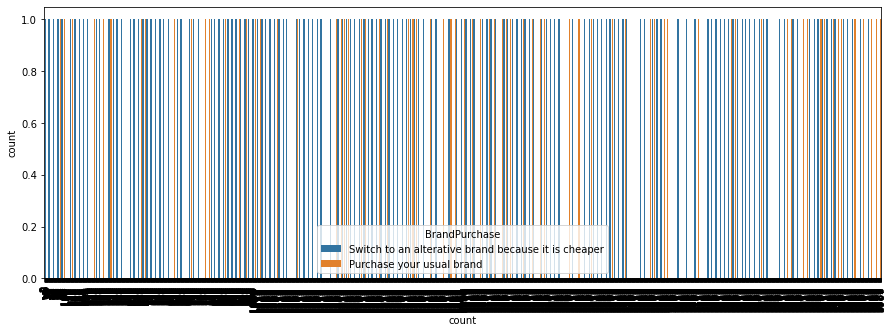

In [16]:
# loop through to visualize if possible
bp = new_rawData["BrandPurchase"]
colNo = 0
while colNo < len(new_rawData.columns):
    plt.figure(figsize=(15,5))
    plt.rcParams['figure.figsize'] = (2,2)
    sns.countplot(x=new_rawData.columns[colNo], hue= bp, data=new_rawData)
    plt.xticks(rotation=90)
    colNo = colNo + 1 

<br>
<h2>Visualization for all the columns agains the second target variable (Food Shopping)</h2>

C:\Users\Ellahhh\AppData\Local\Temp\ipykernel_9640\4002867920.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,5))


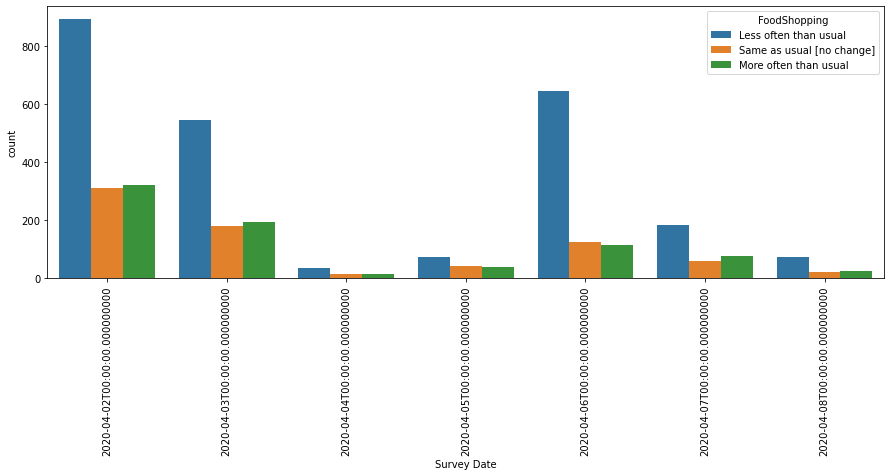

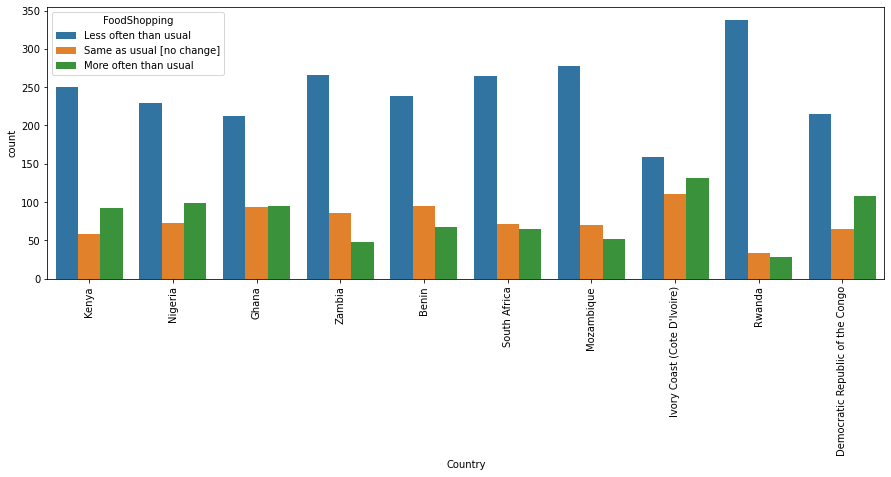

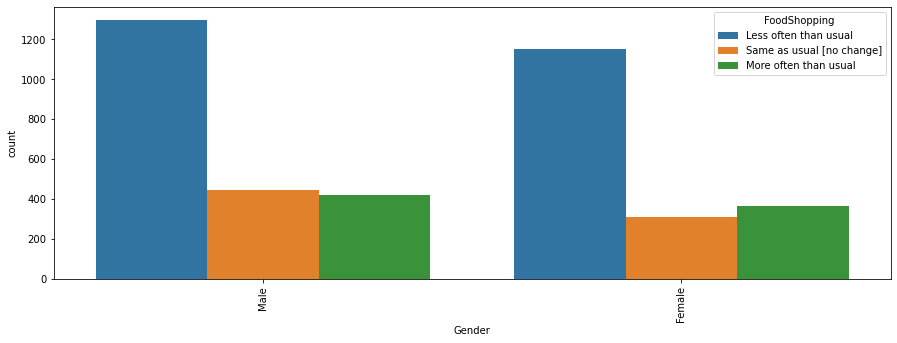

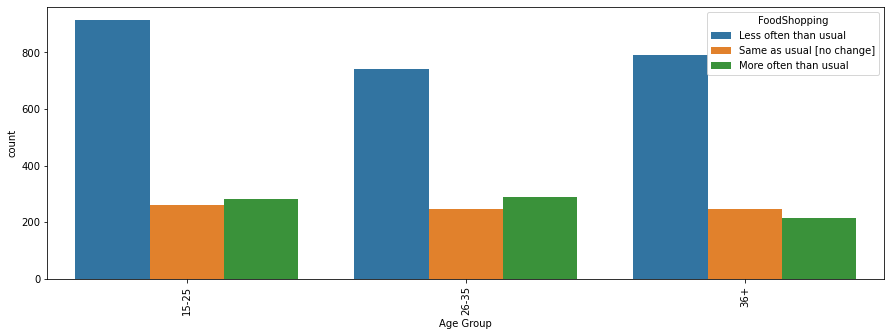

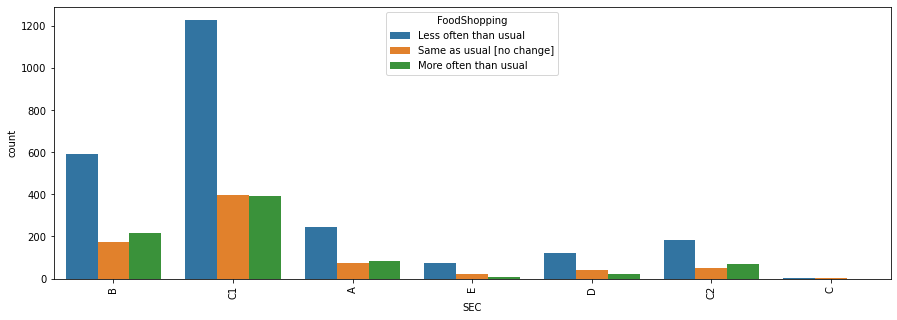

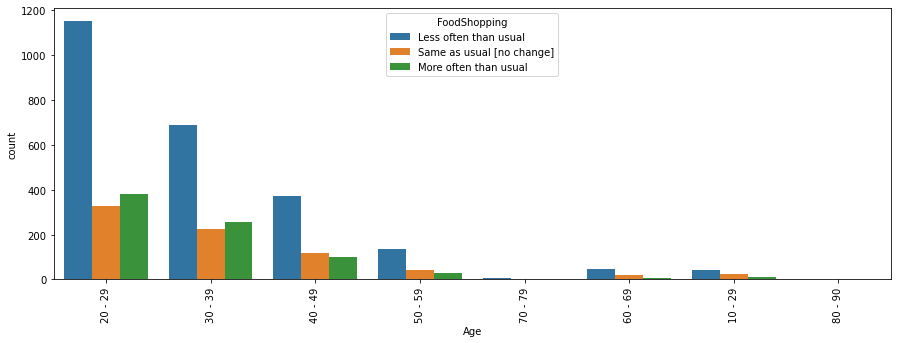

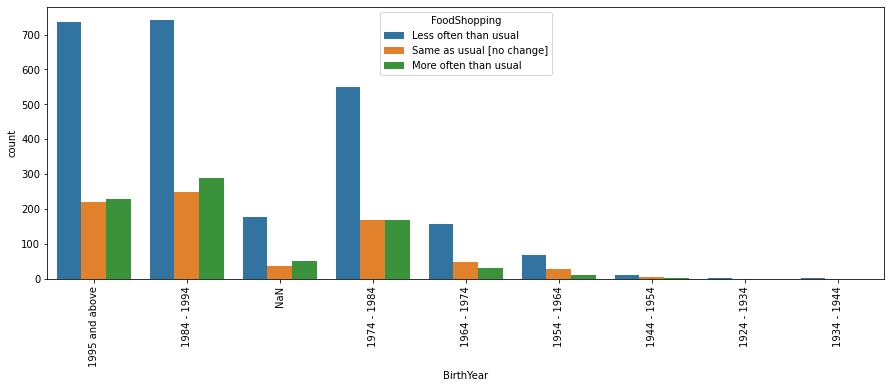

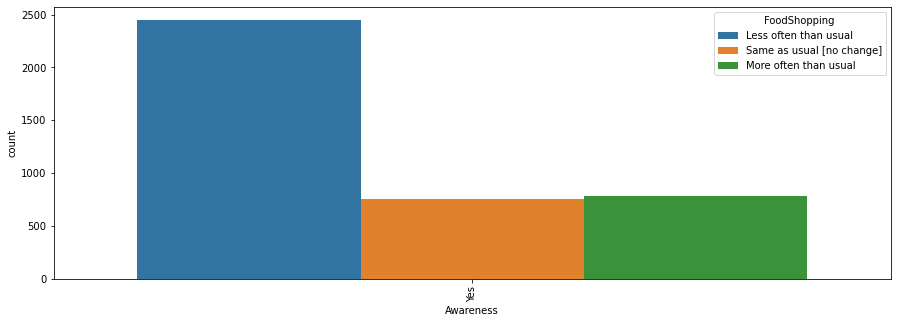

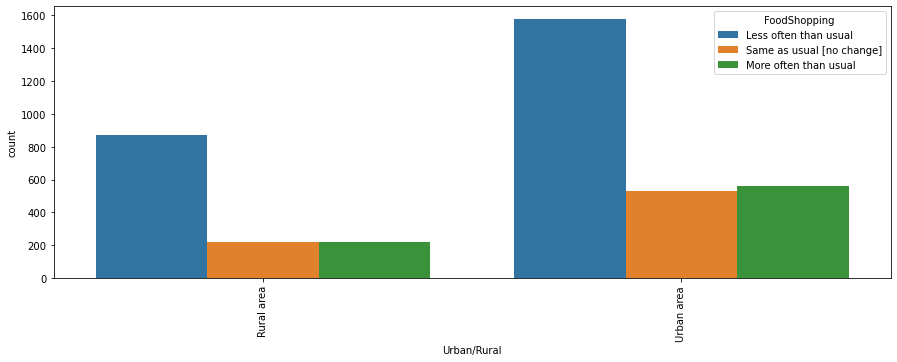

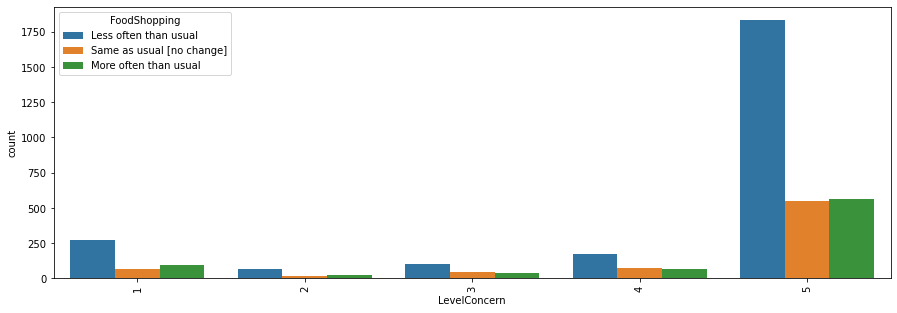

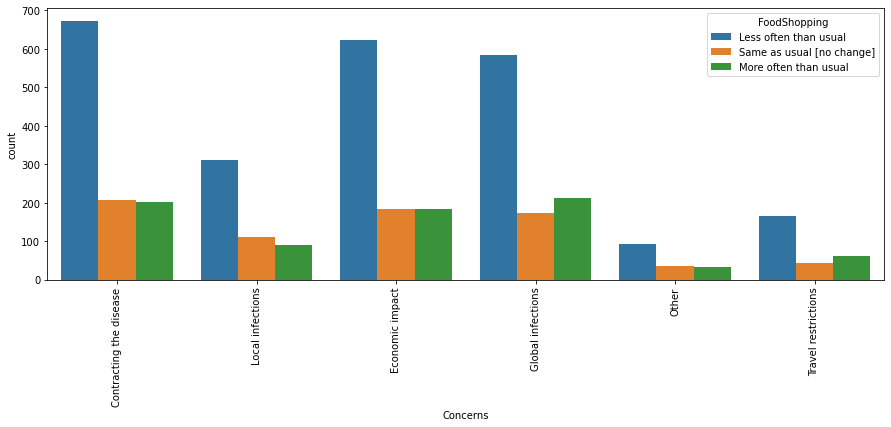

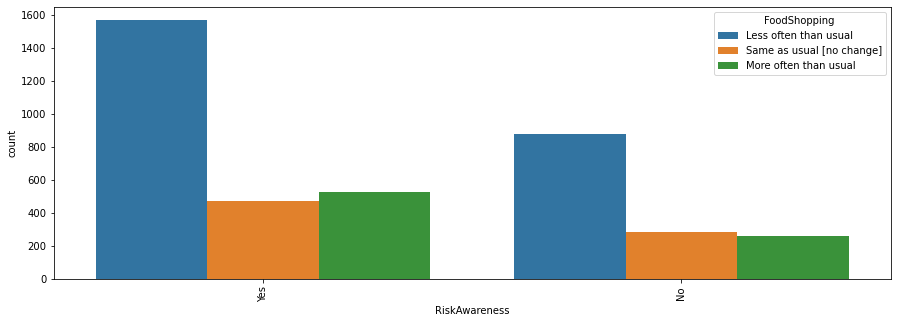

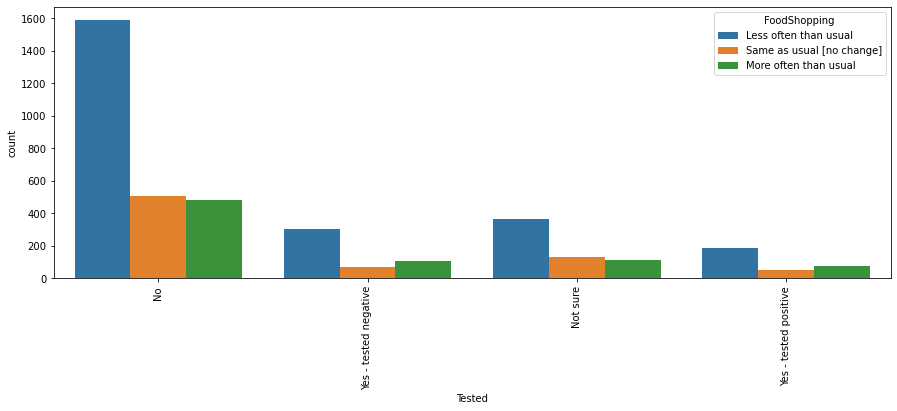

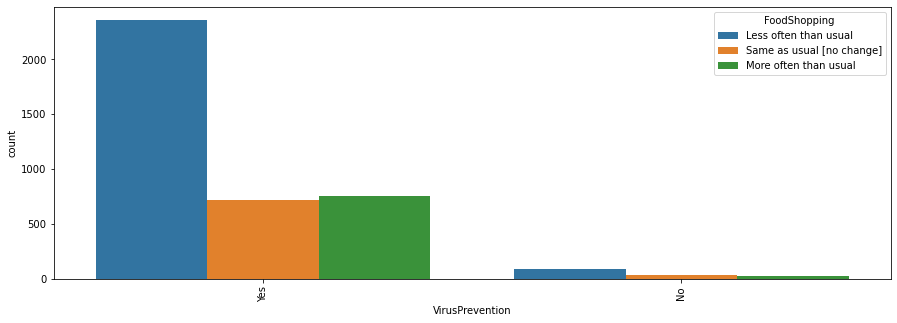

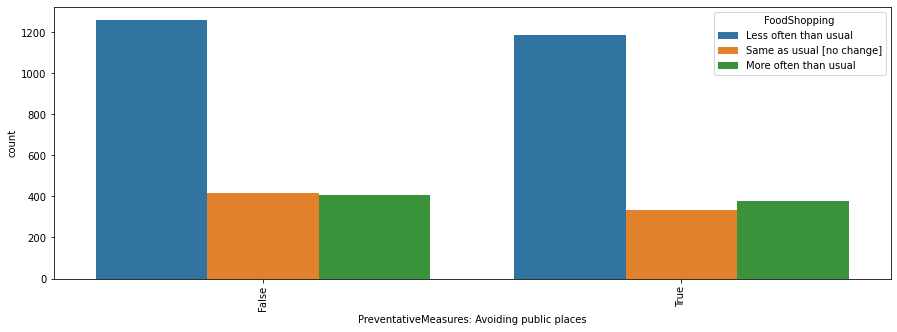

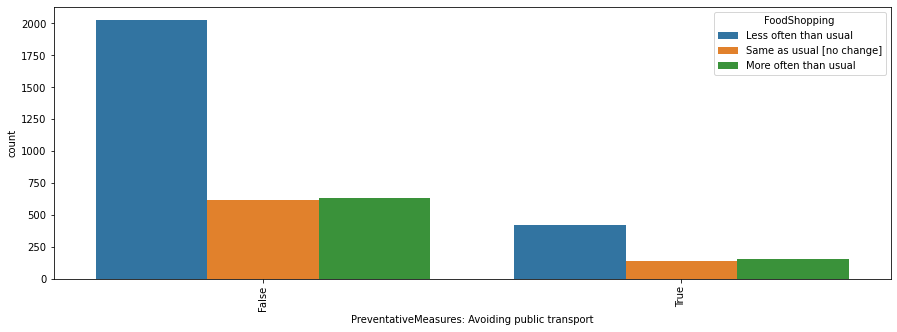

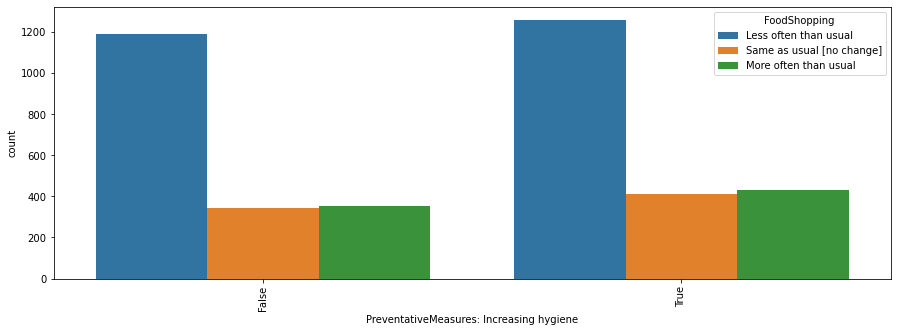

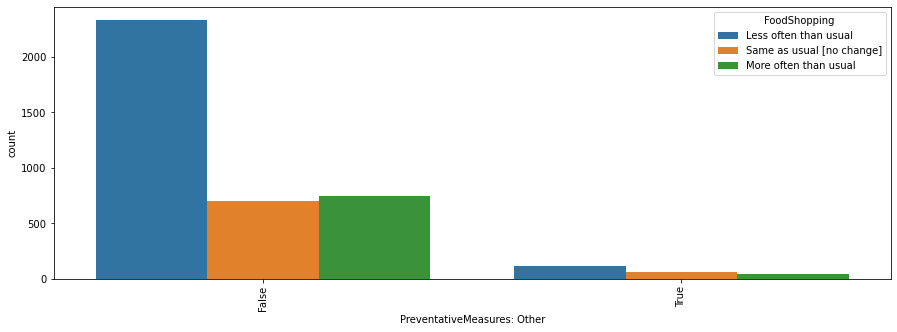

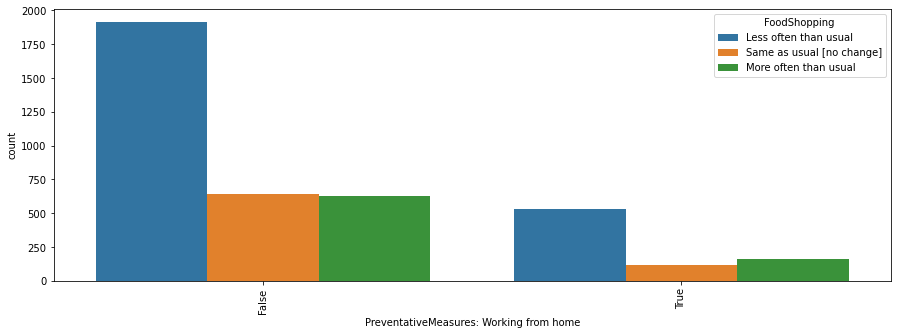

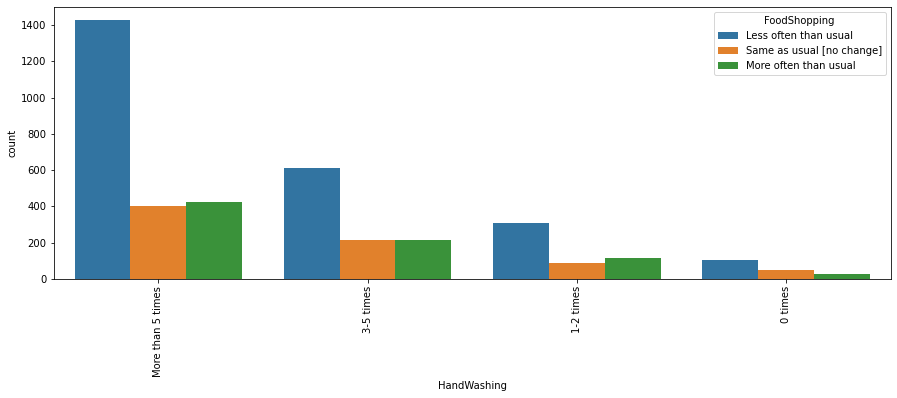

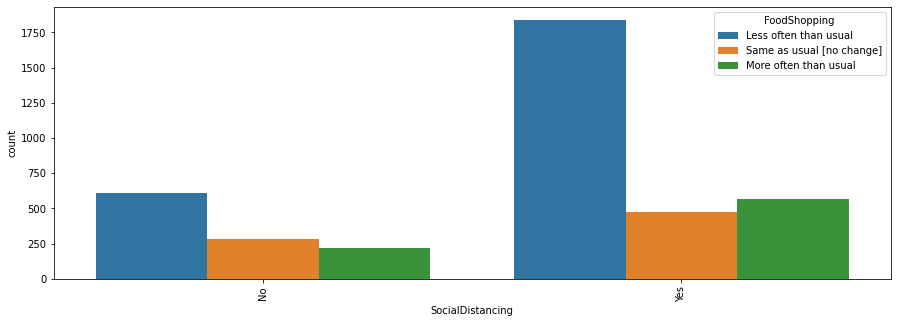

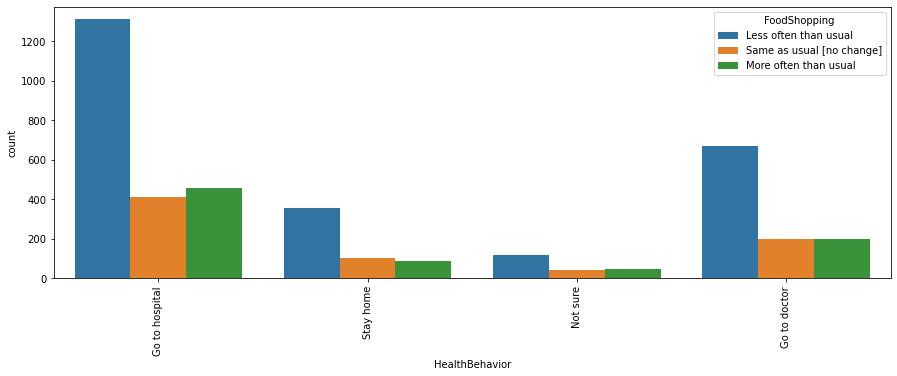

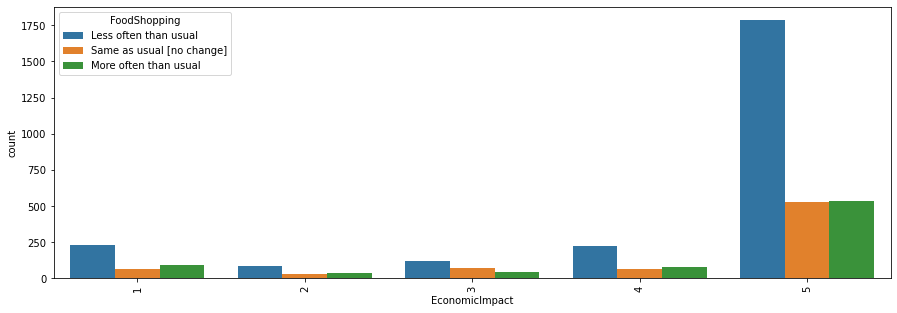

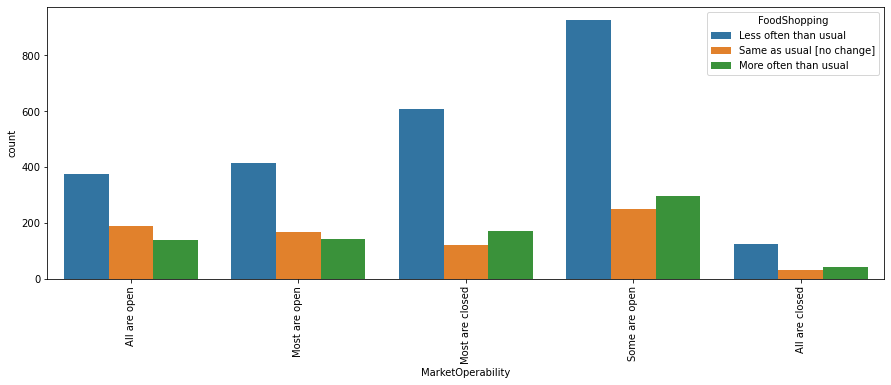

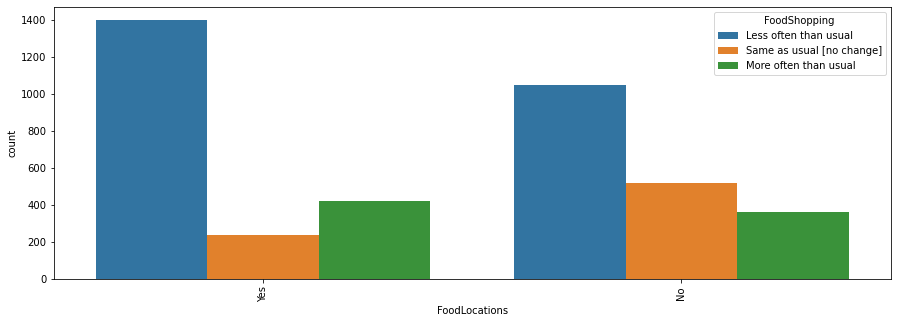

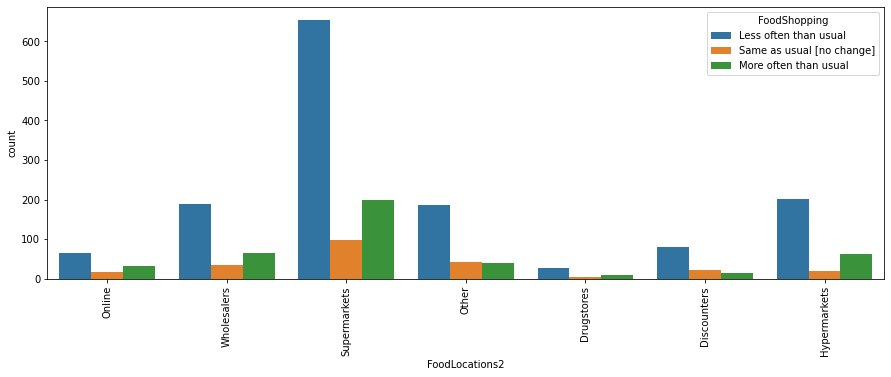

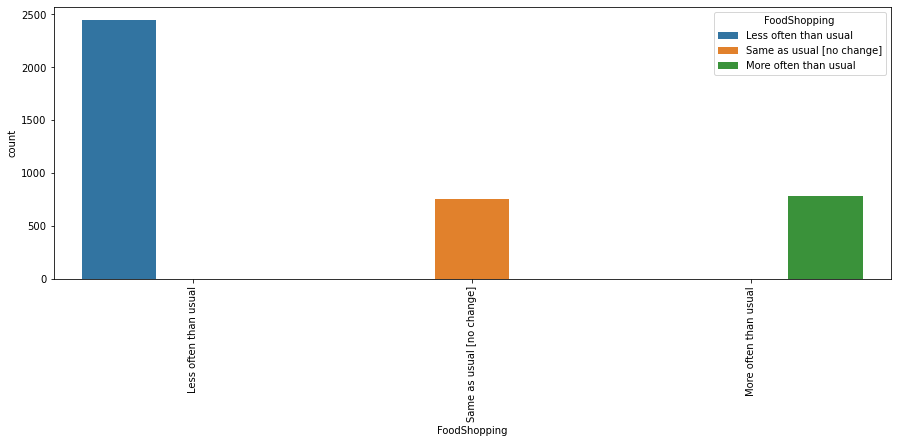

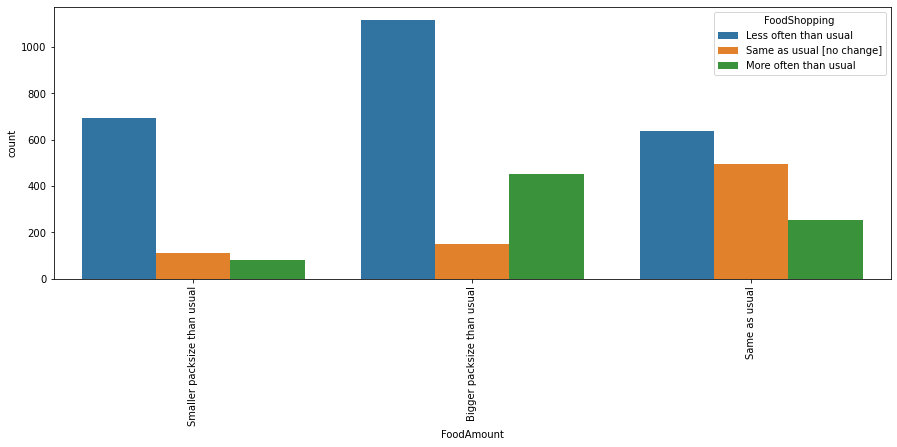

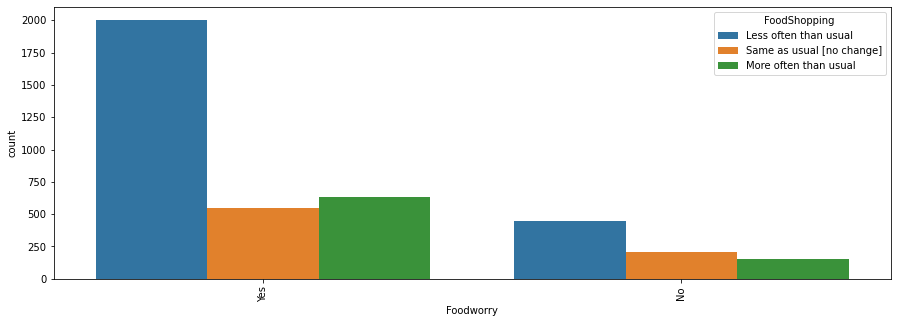

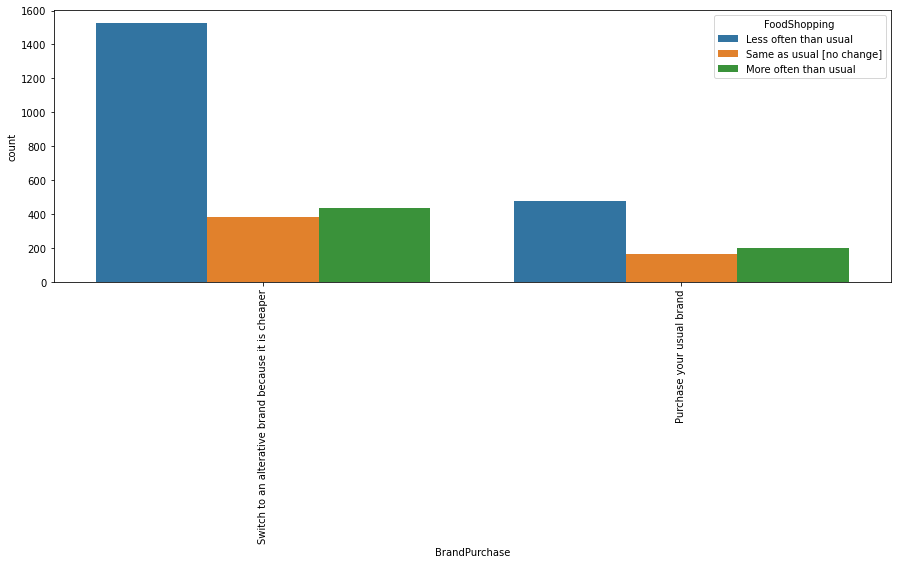

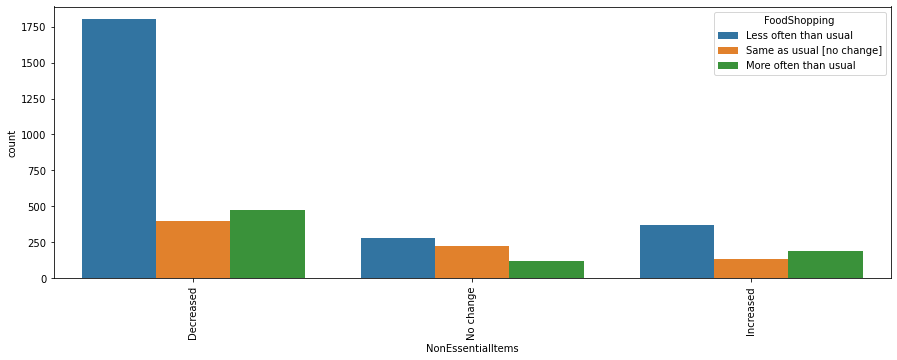

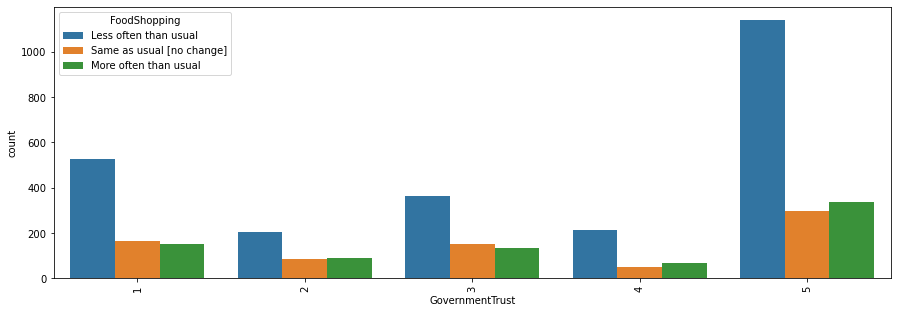

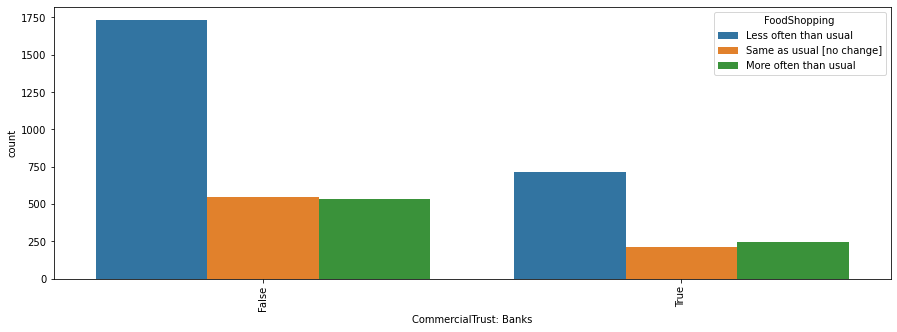

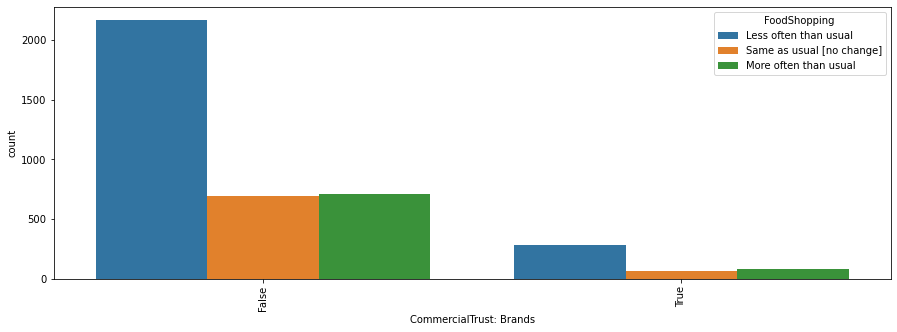

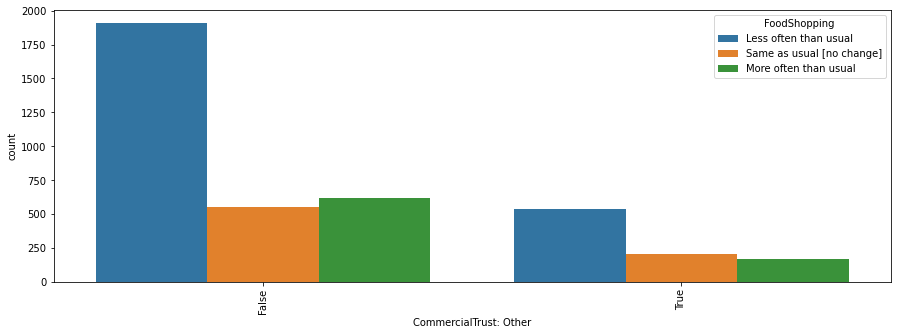

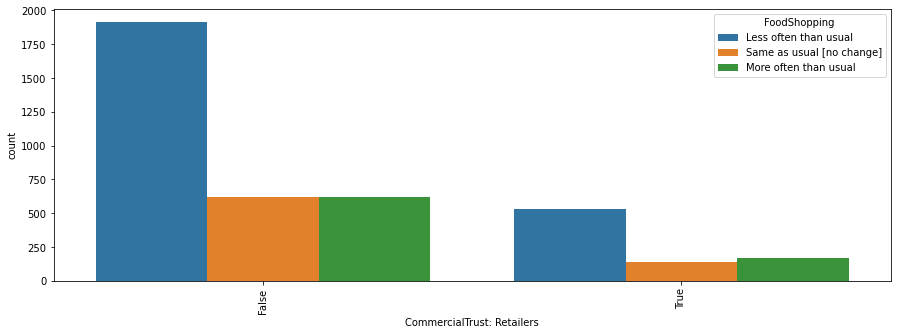

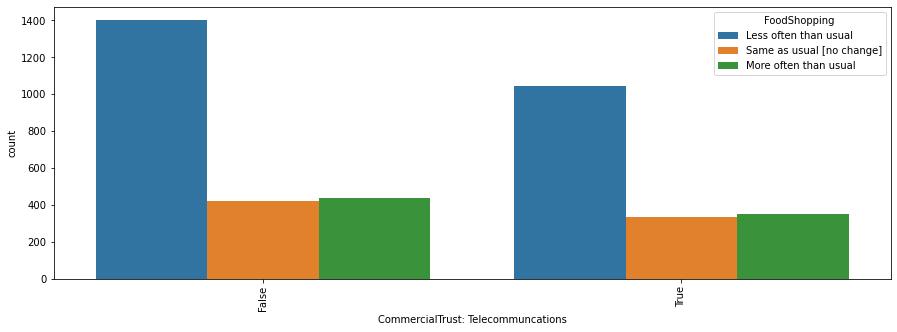

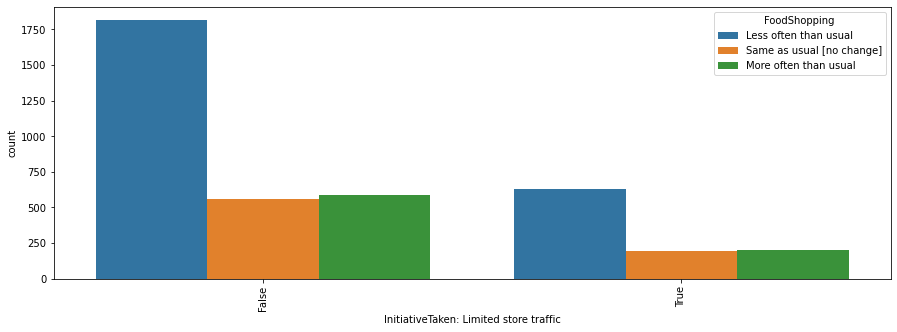

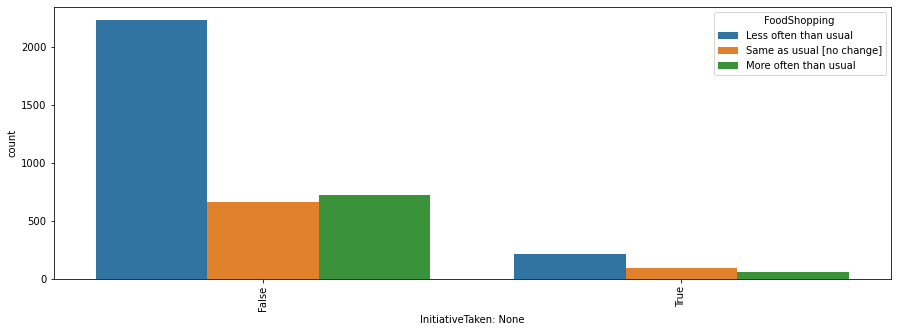

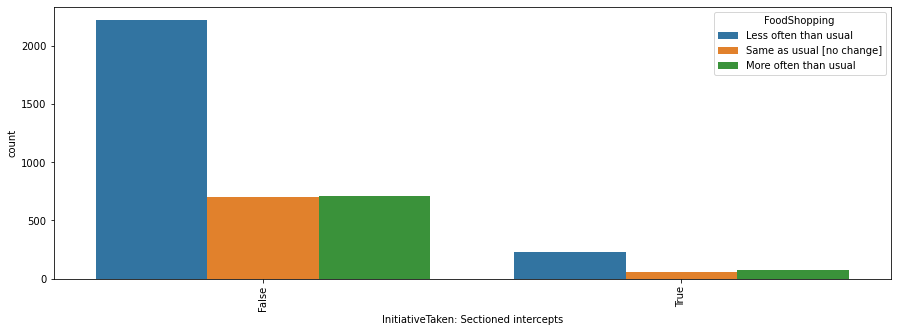

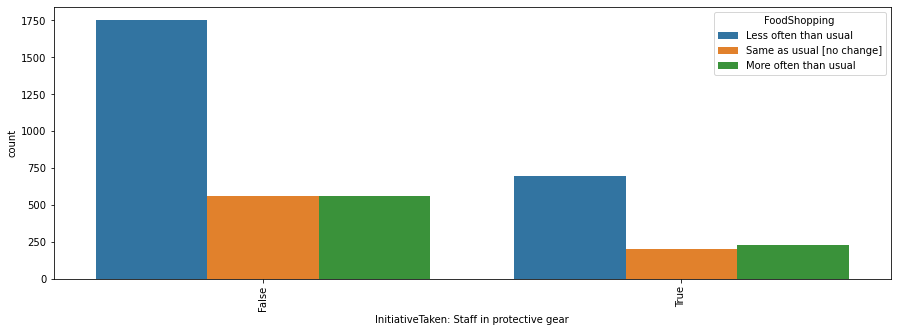

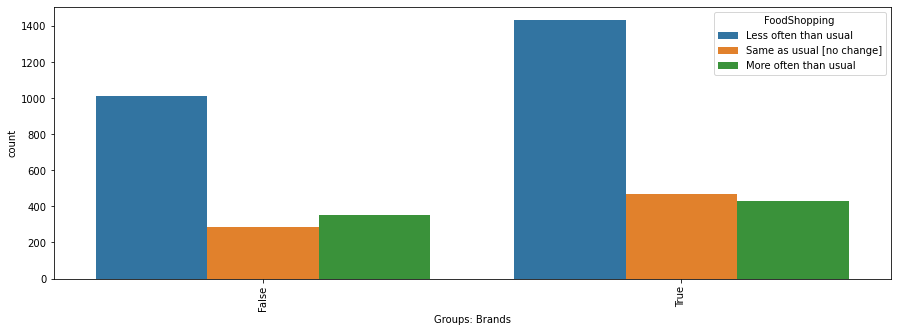

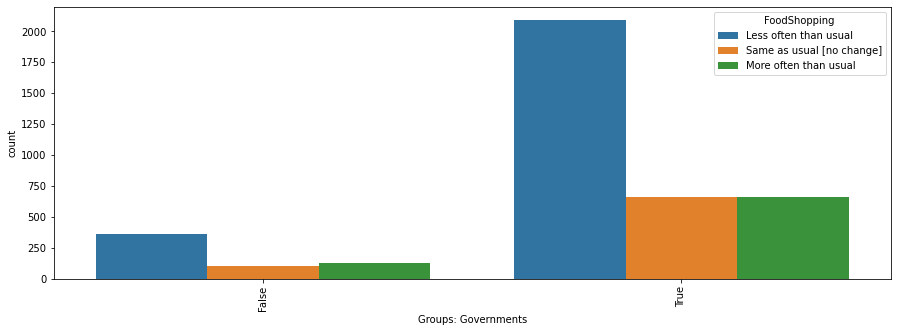

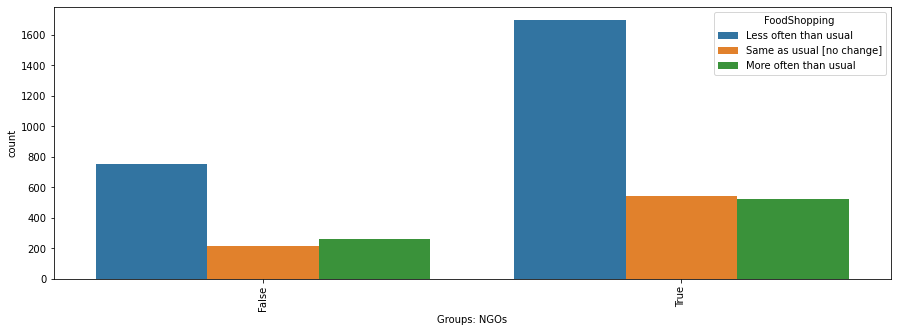

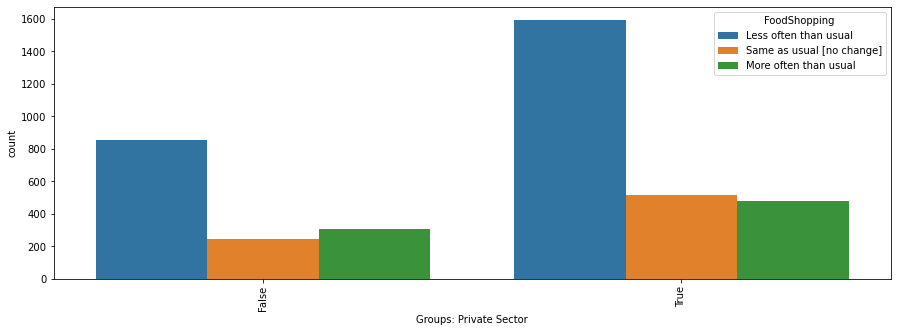

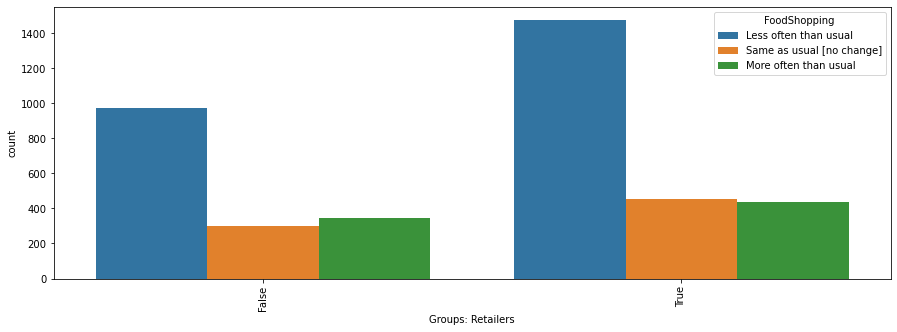

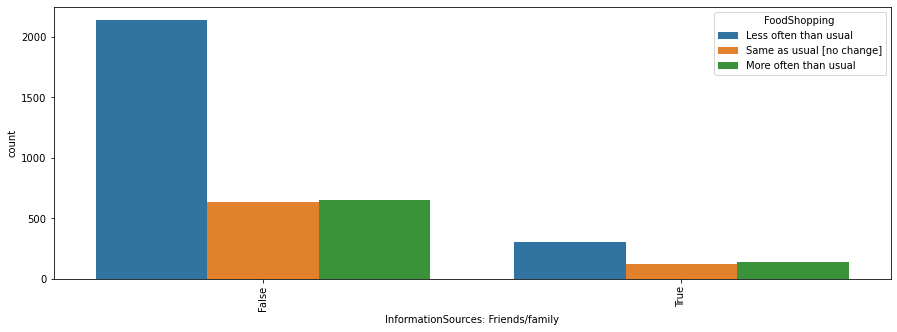

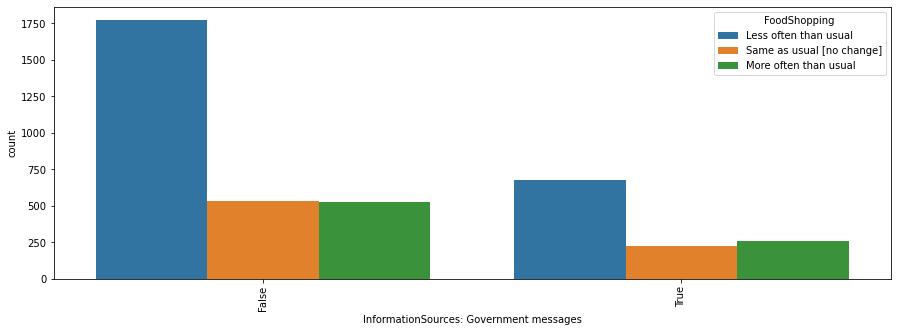

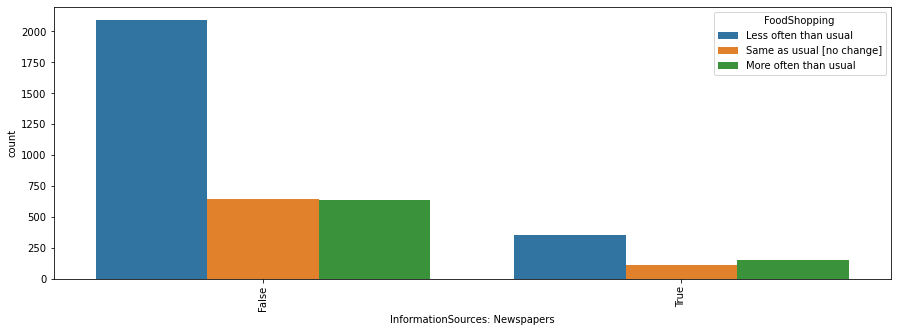

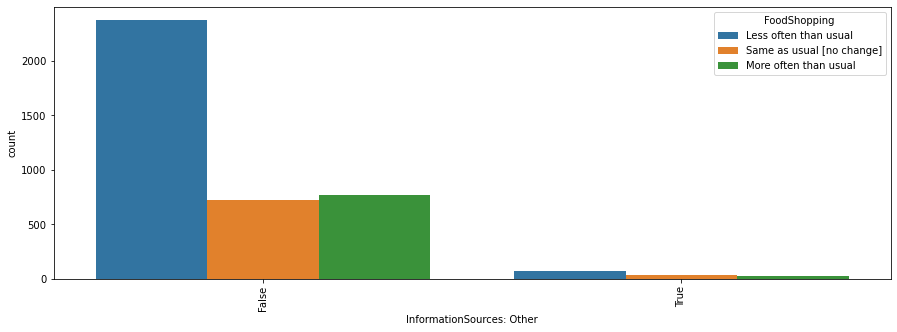

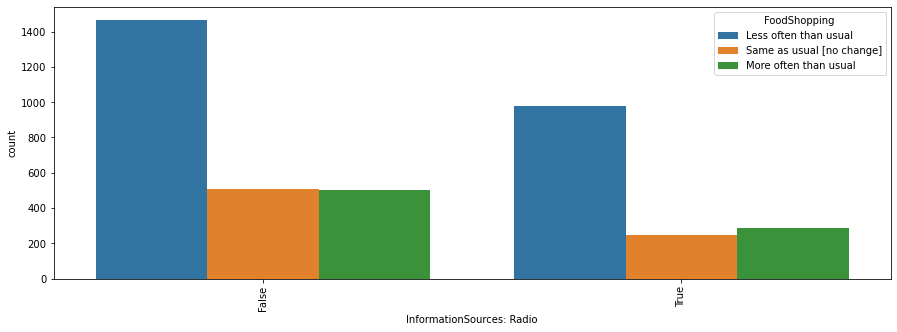

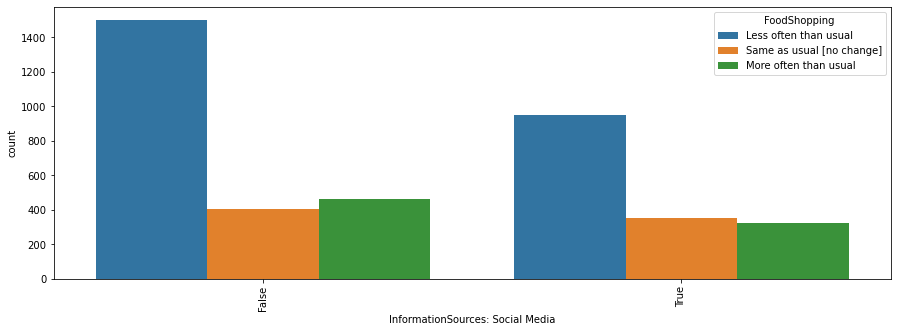

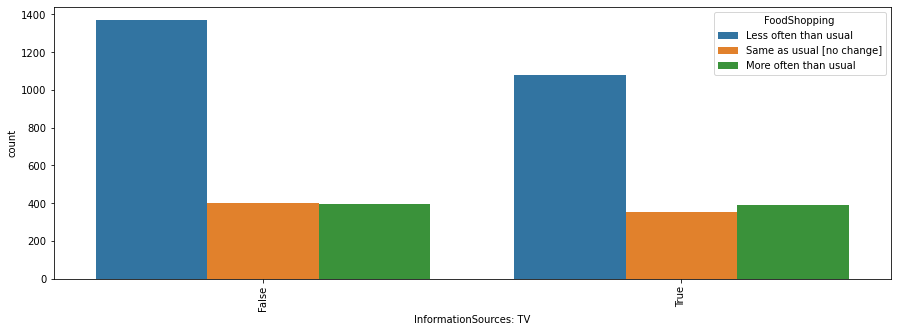

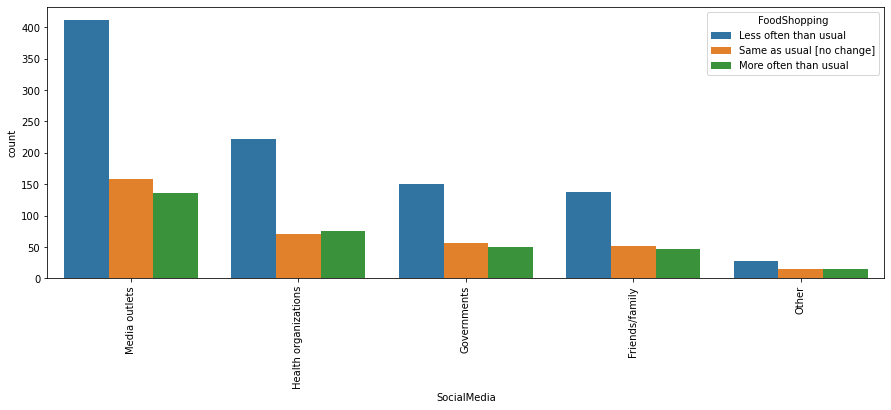

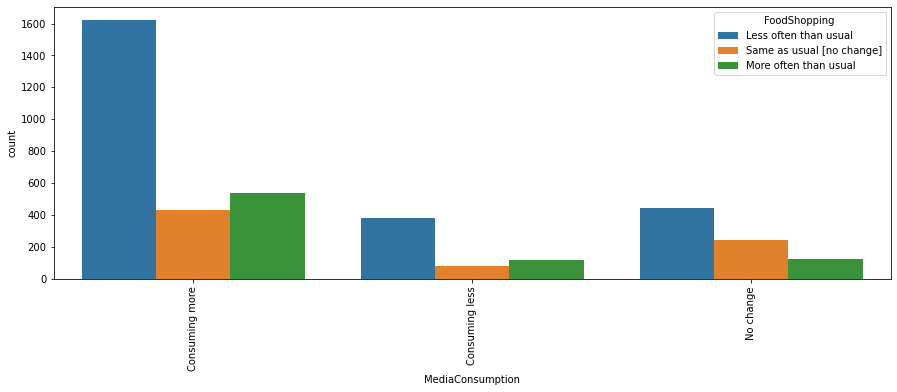

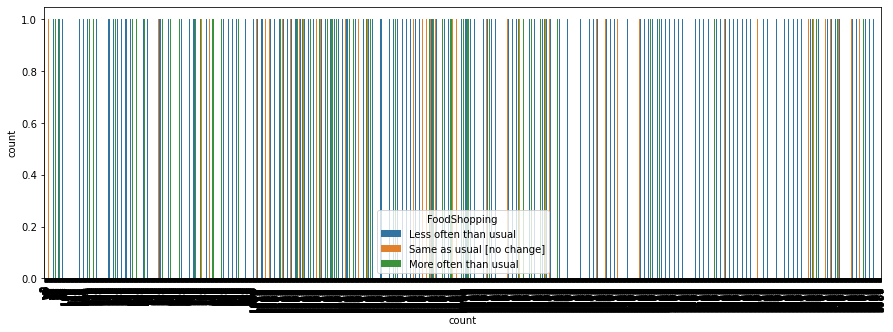

In [17]:
fs = new_rawData["FoodShopping"]
# print(bp)
colNo = 0
while colNo < len(new_rawData.columns):
    plt.figure(figsize=(15,5))
    plt.rcParams['figure.figsize'] = (2,2)
    sns.countplot(x=new_rawData.columns[colNo], hue= fs, data=new_rawData)
    plt.xticks(rotation=90)
    colNo = colNo + 1 

<br>
<h2>Visualization for all the columns agains the third target variable (Food Amount)</h2>

C:\Users\Ellahhh\AppData\Local\Temp\ipykernel_9640\216282589.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,5))


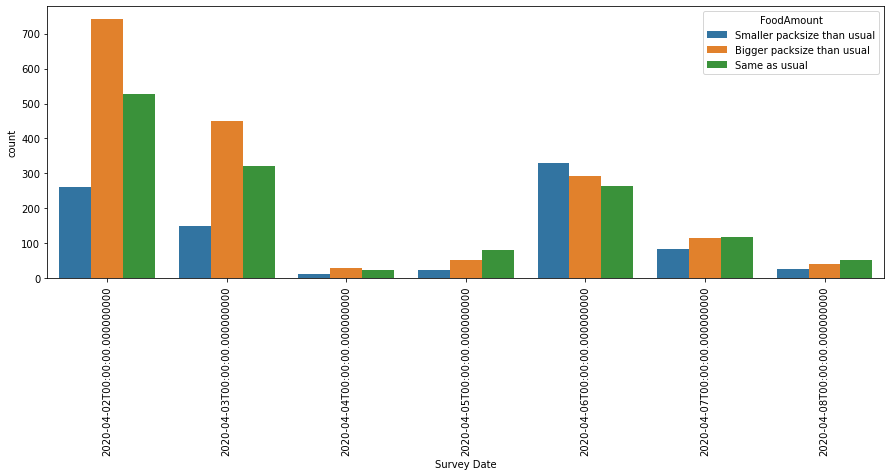

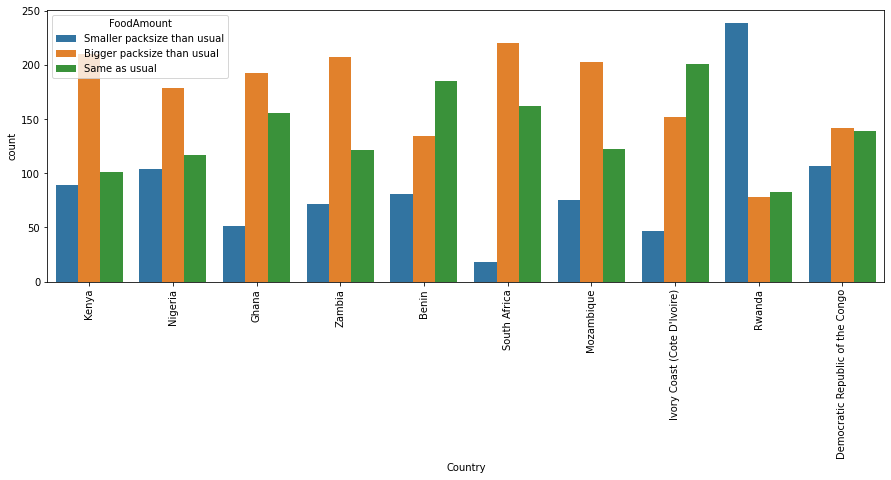

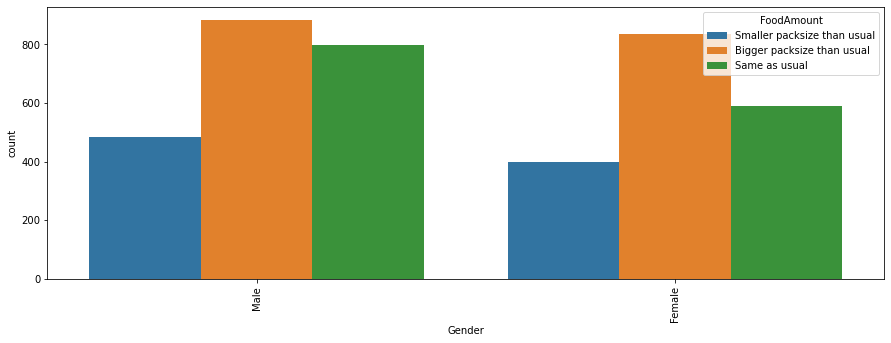

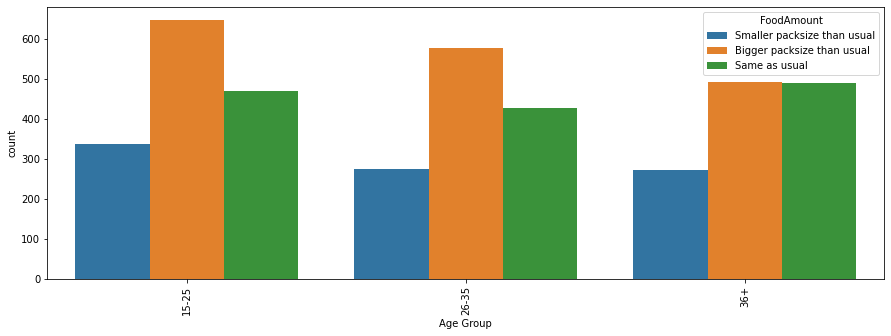

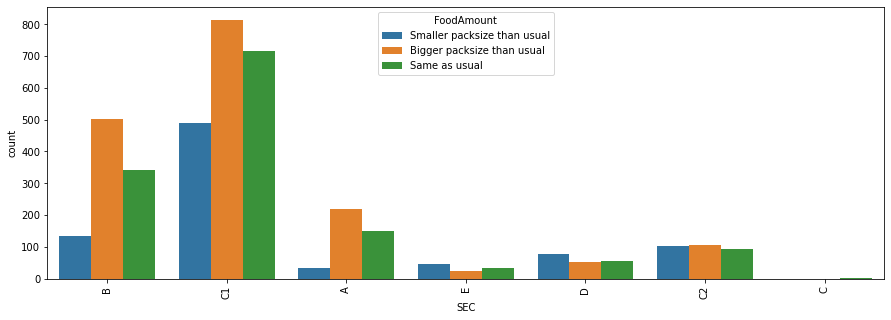

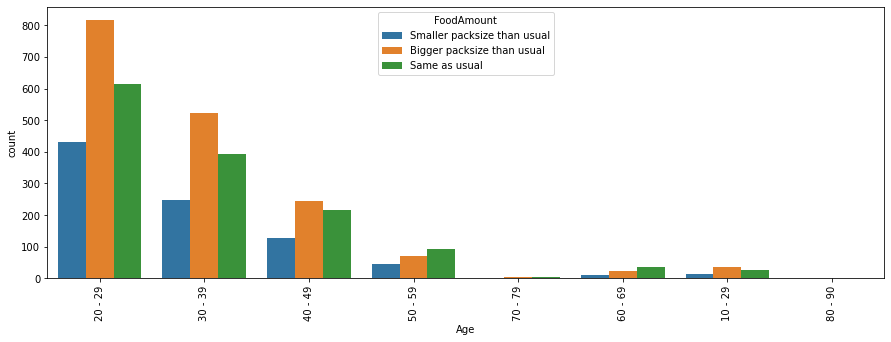

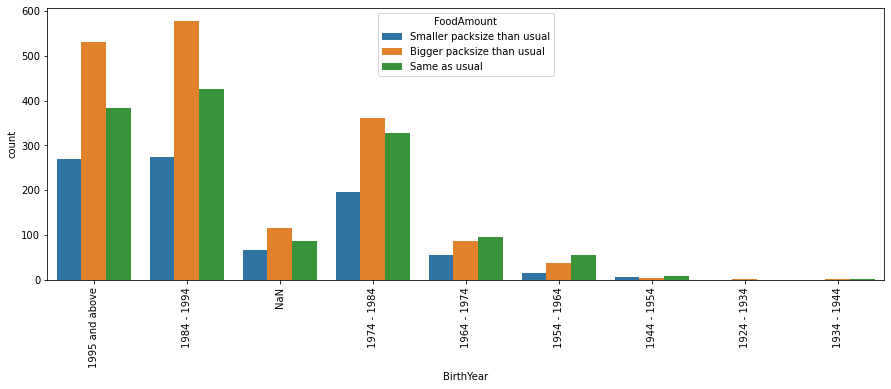

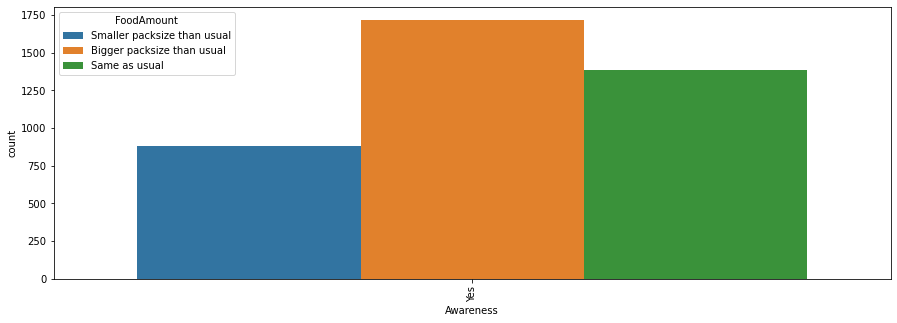

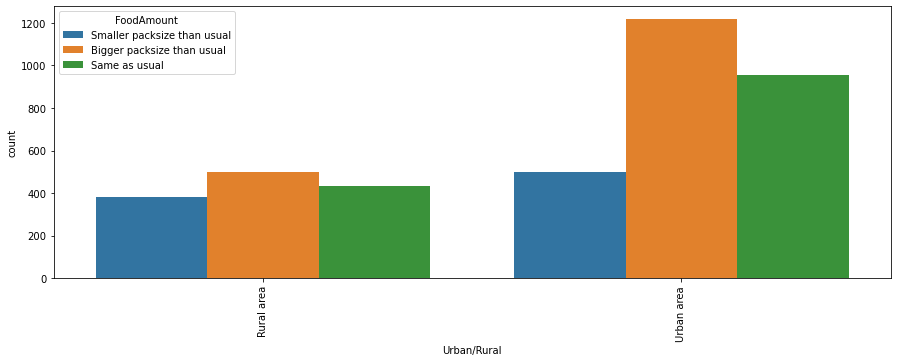

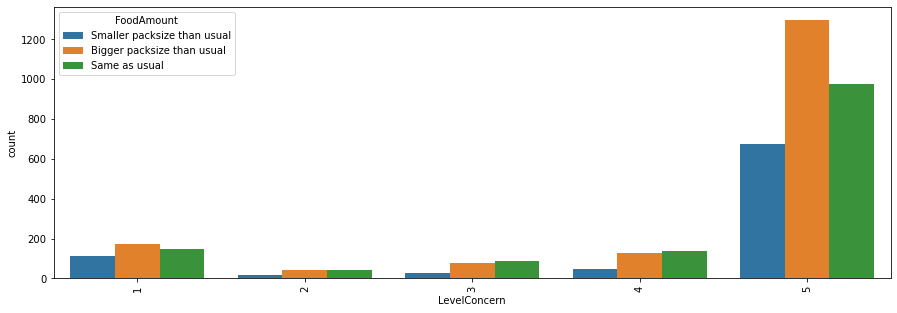

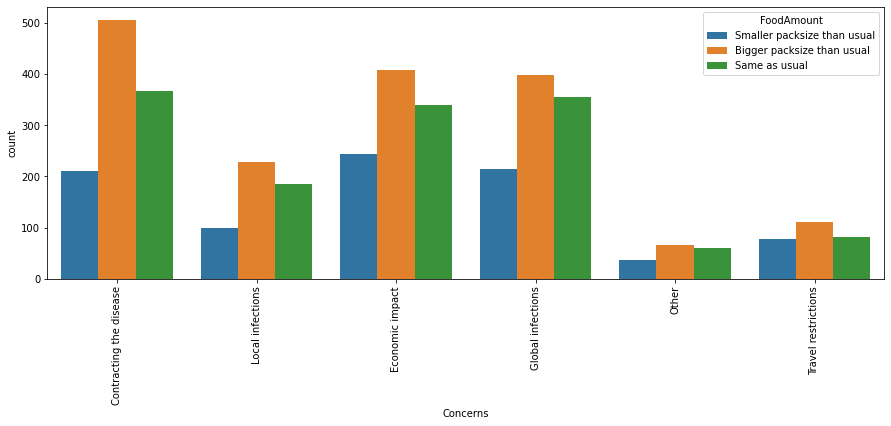

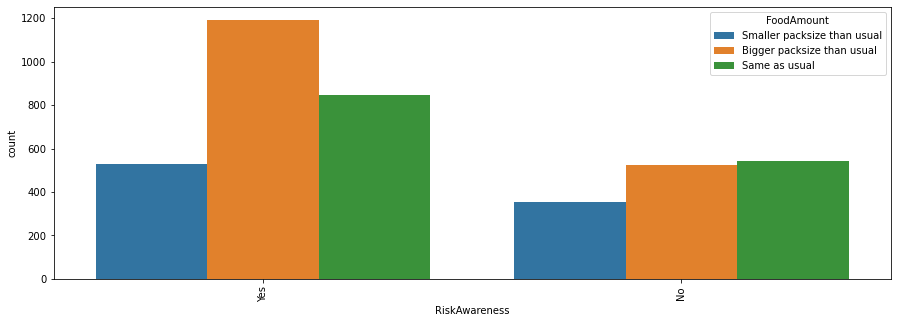

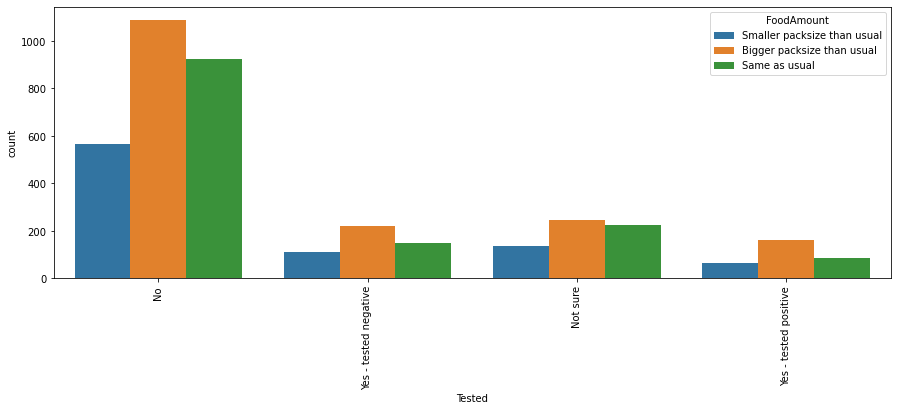

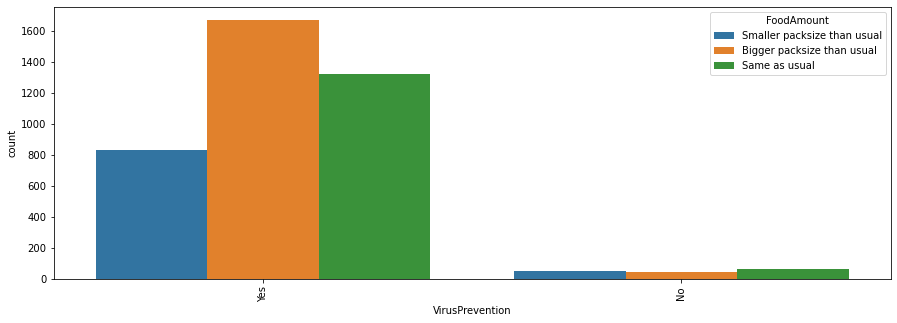

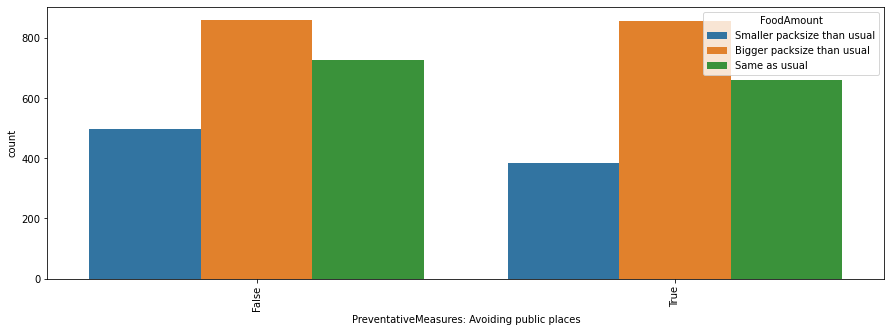

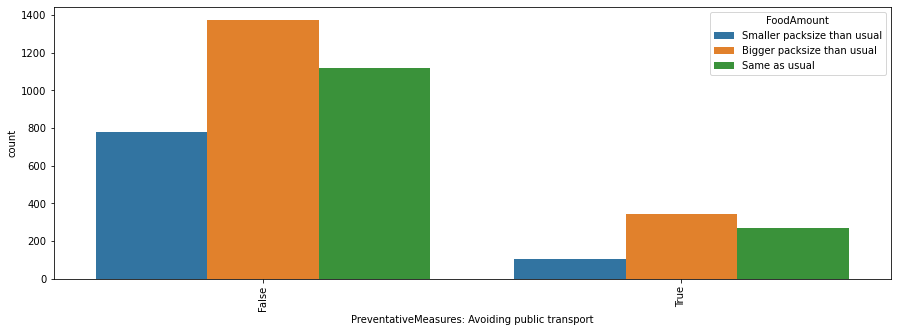

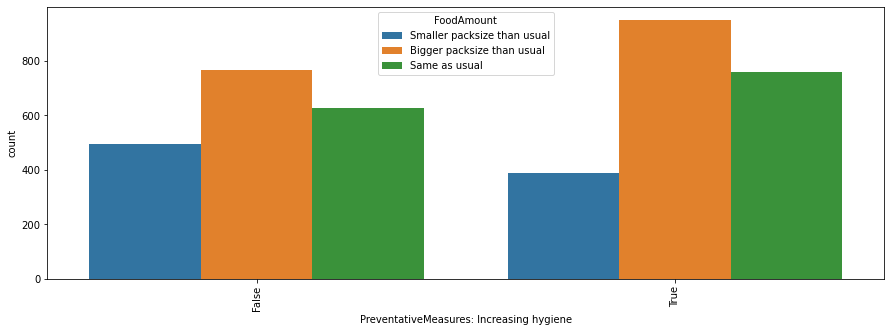

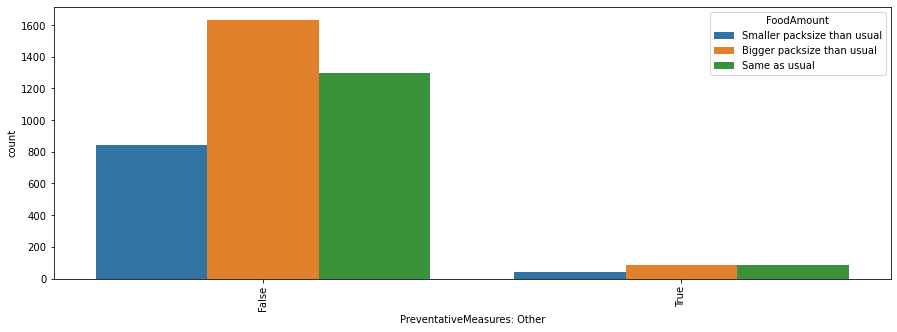

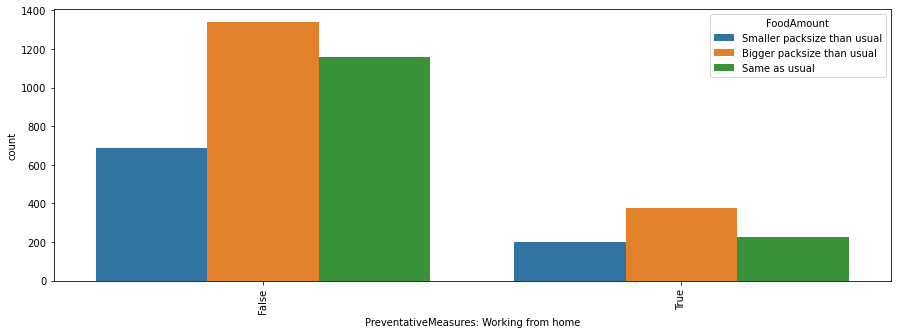

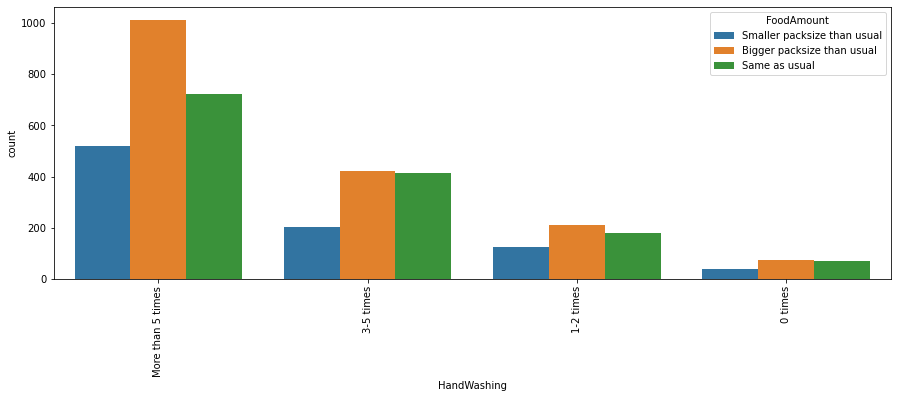

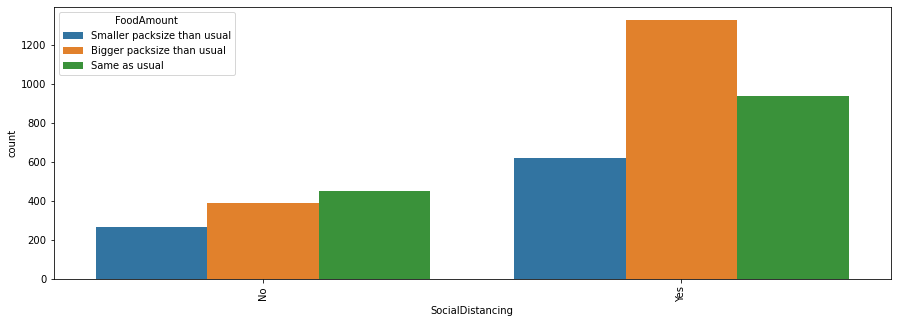

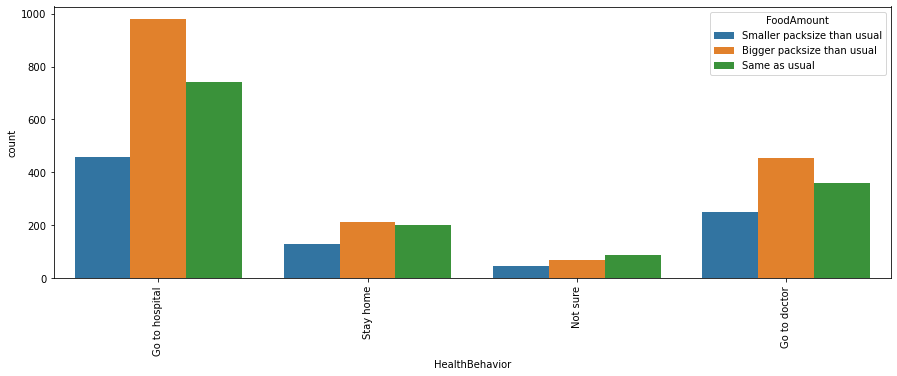

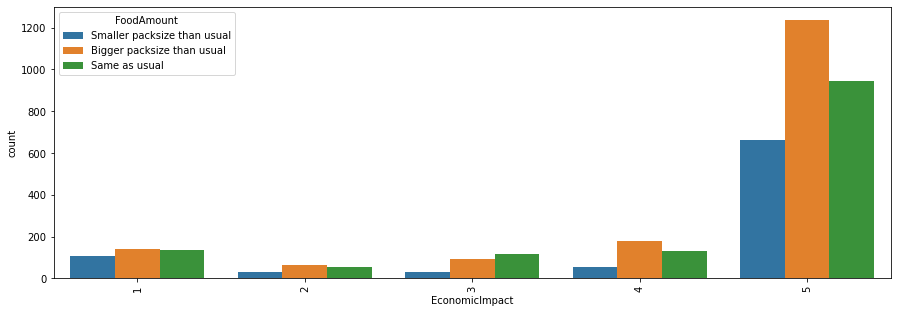

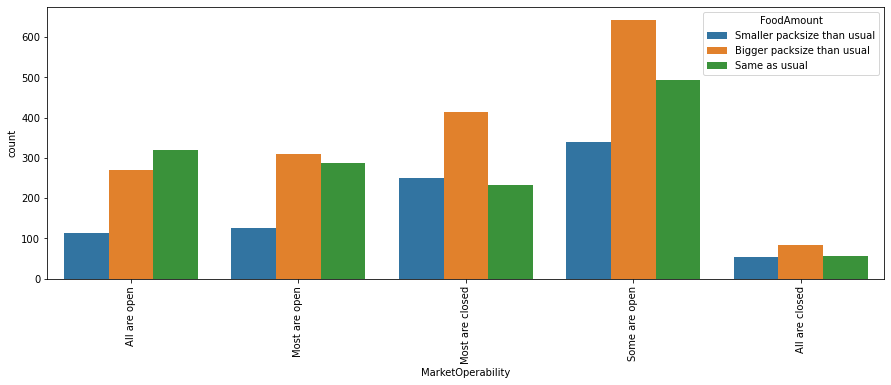

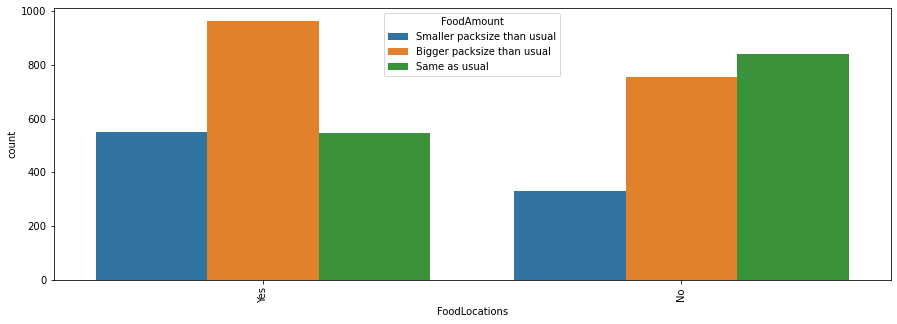

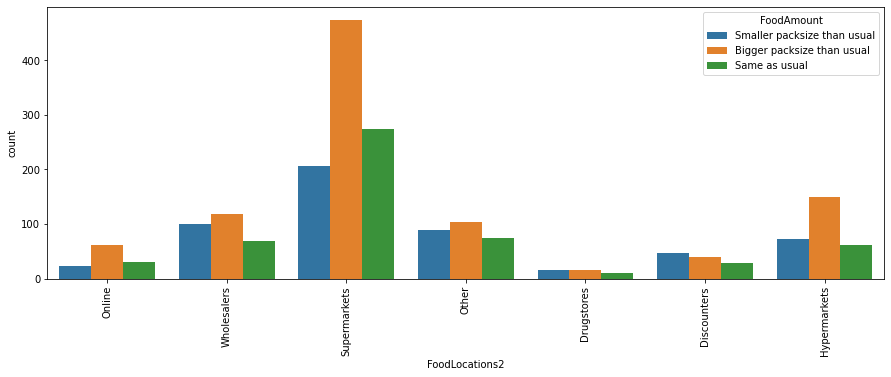

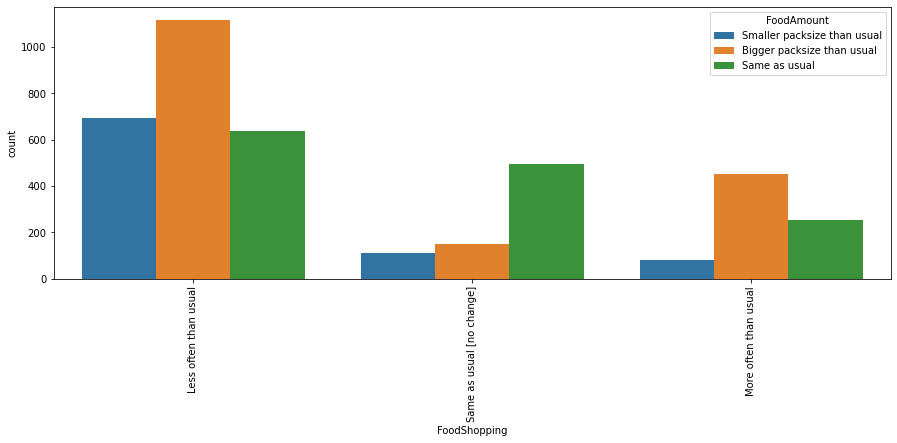

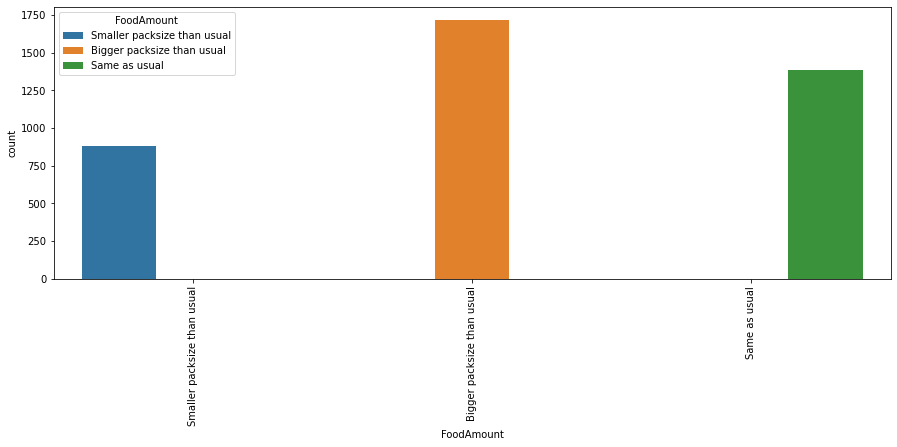

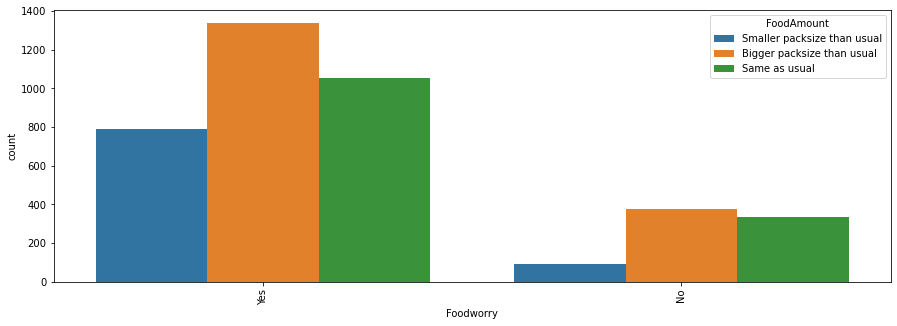

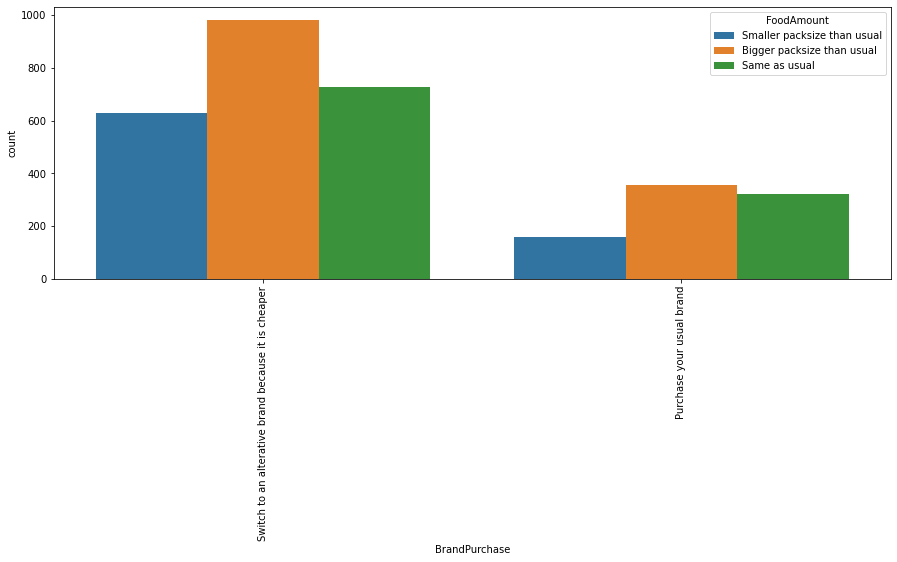

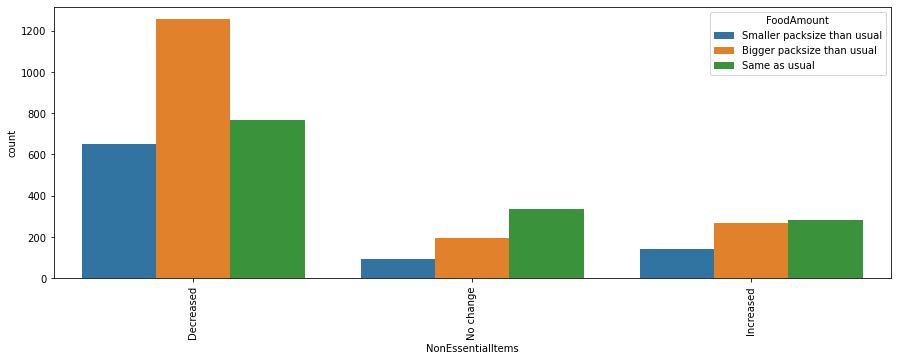

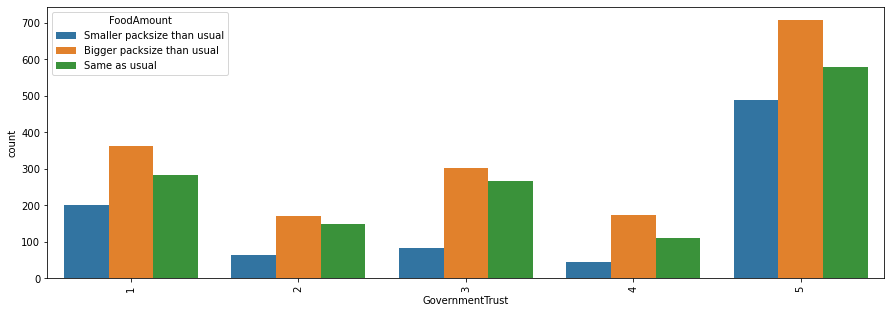

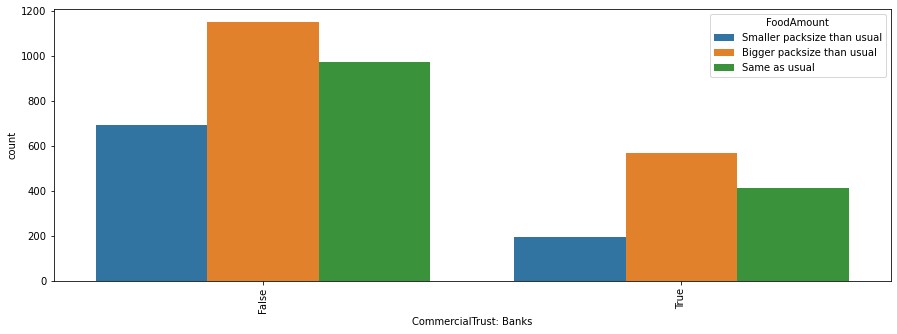

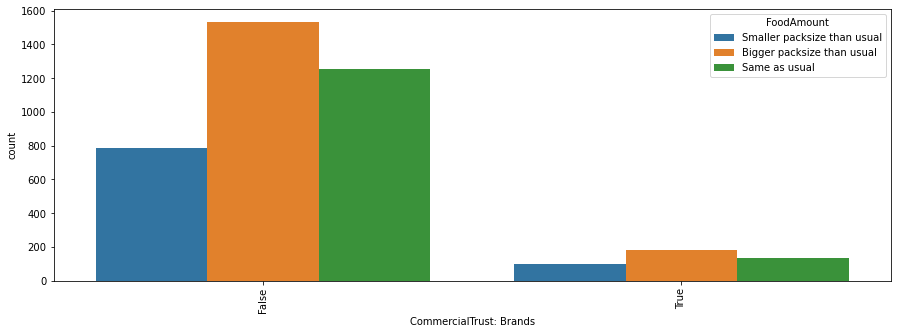

In [ ]:
fa = new_rawData["FoodAmount"]
colNo = 0
while colNo < len(new_rawData.columns):
    plt.figure(figsize=(15,5))
    plt.rcParams['figure.figsize'] = (2,2)
    sns.countplot(x=new_rawData.columns[colNo], hue= fa, data=new_rawData)
    plt.xticks(rotation=90)
    colNo = colNo + 1 

<h2>Check for Outliers using Visualization (Boxplot) </h2>

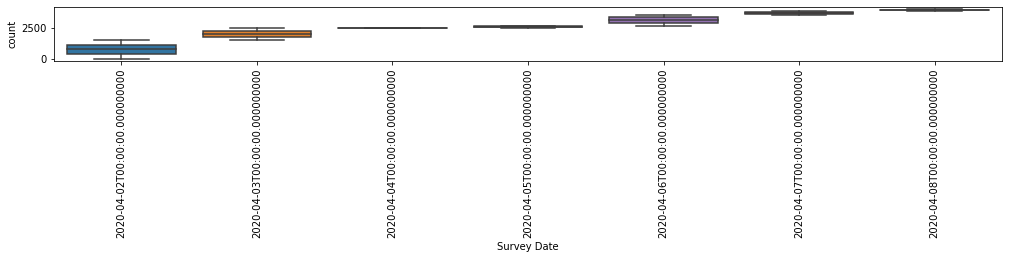

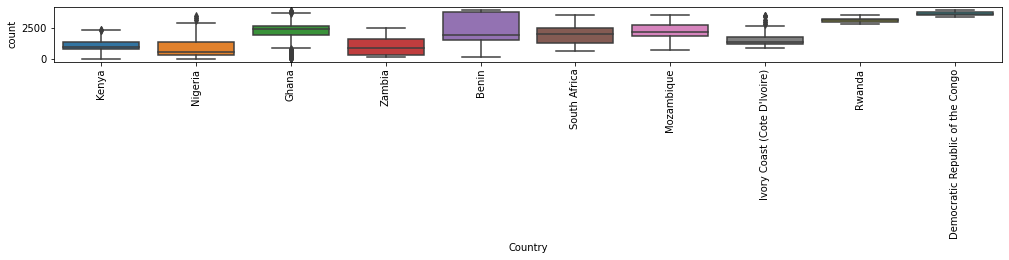

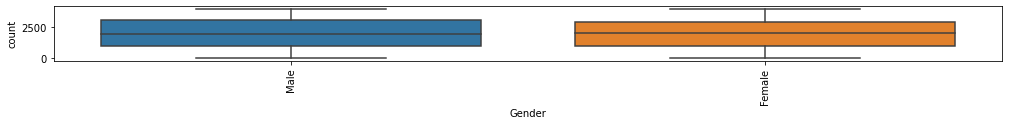

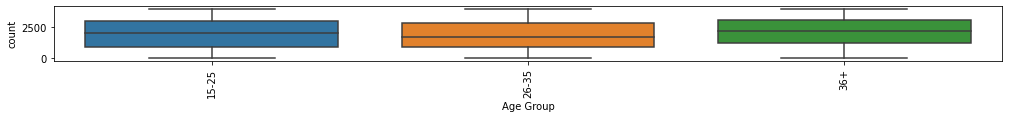

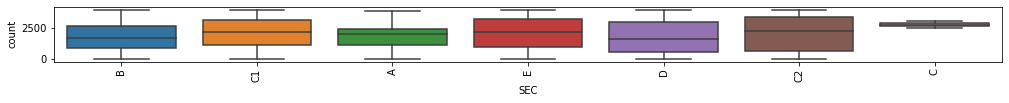

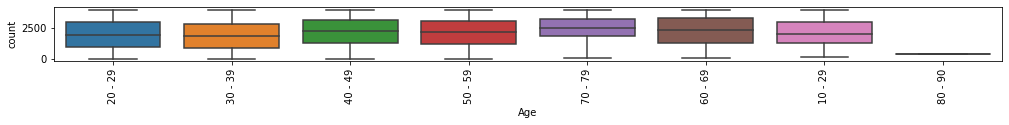

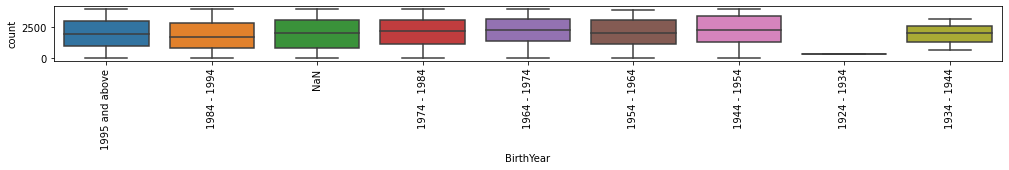

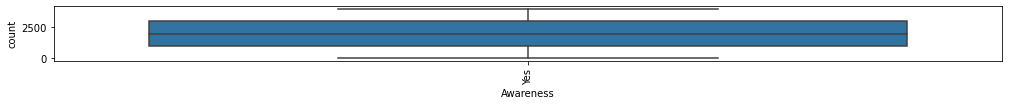

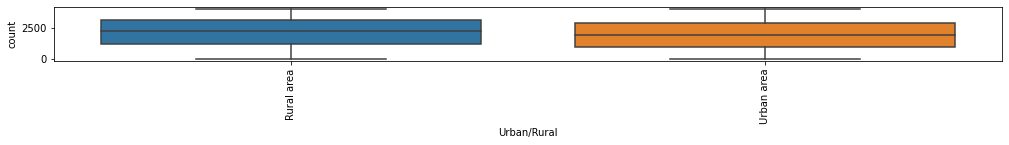

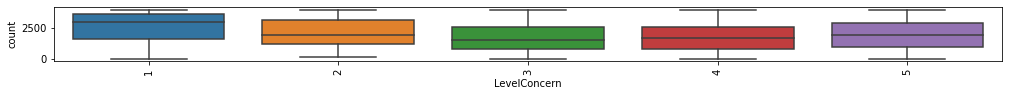

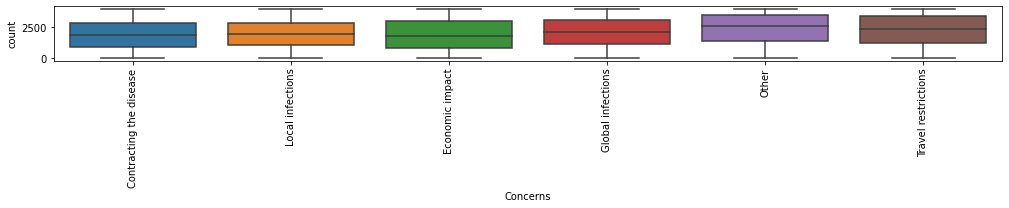

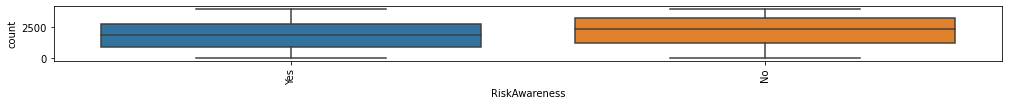

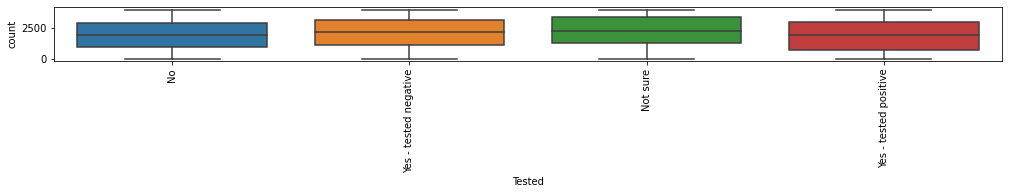

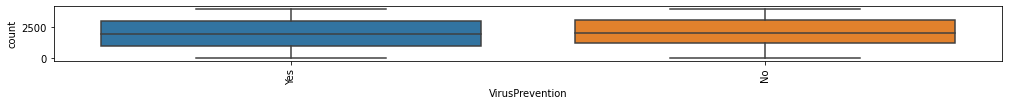

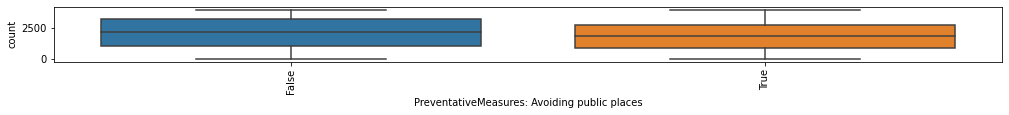

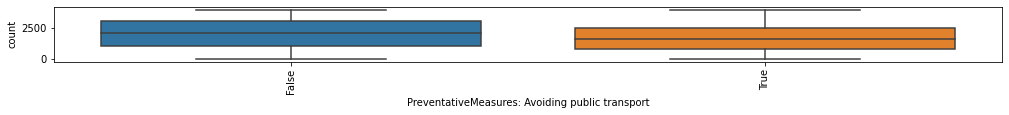

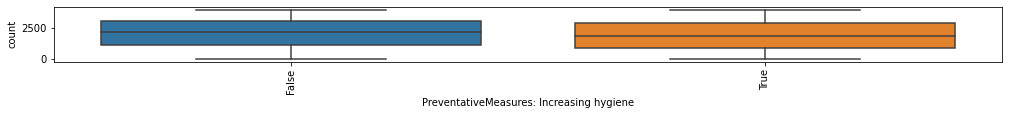

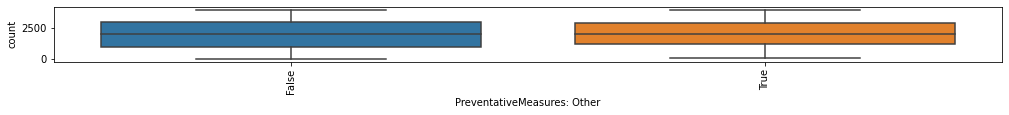

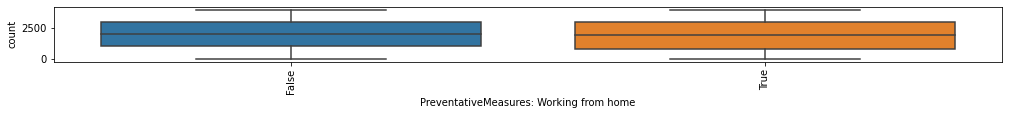

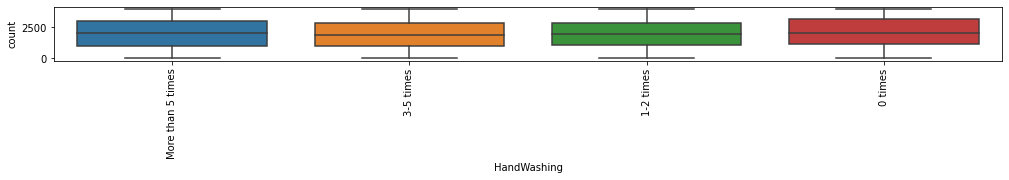

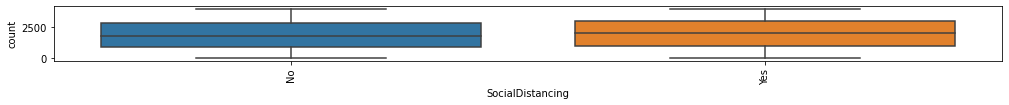

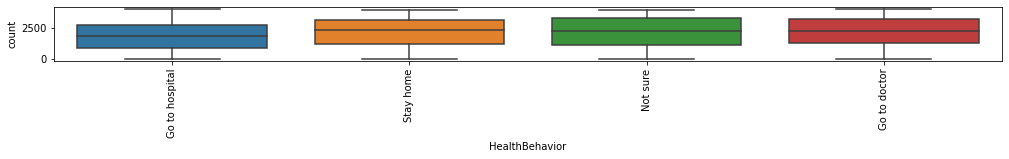

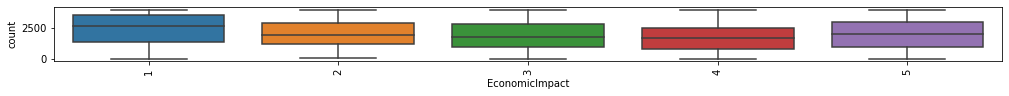

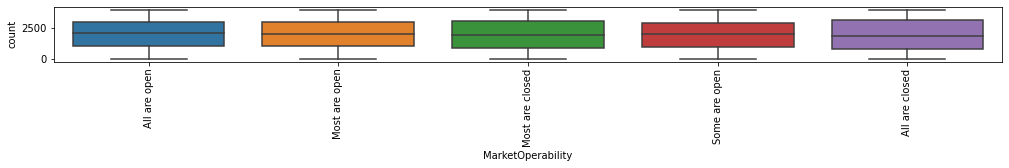

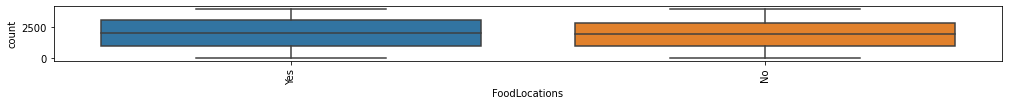

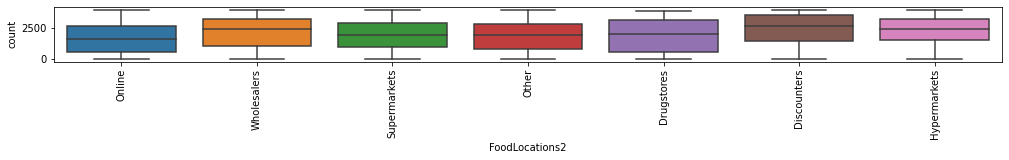

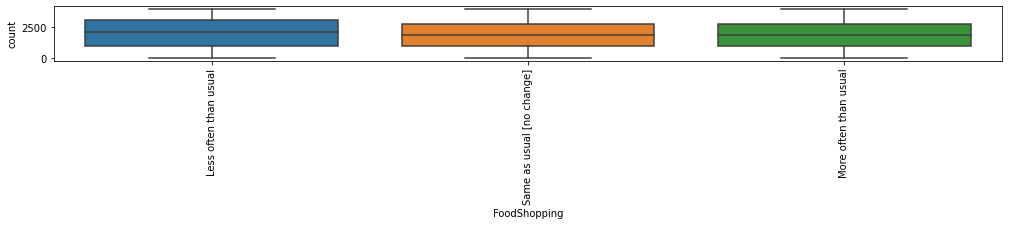

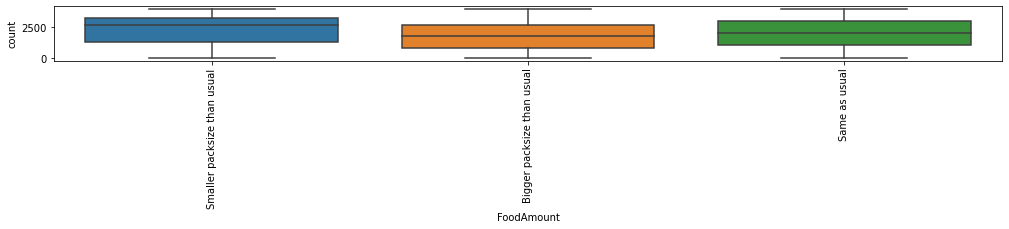

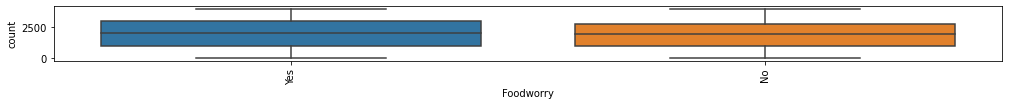

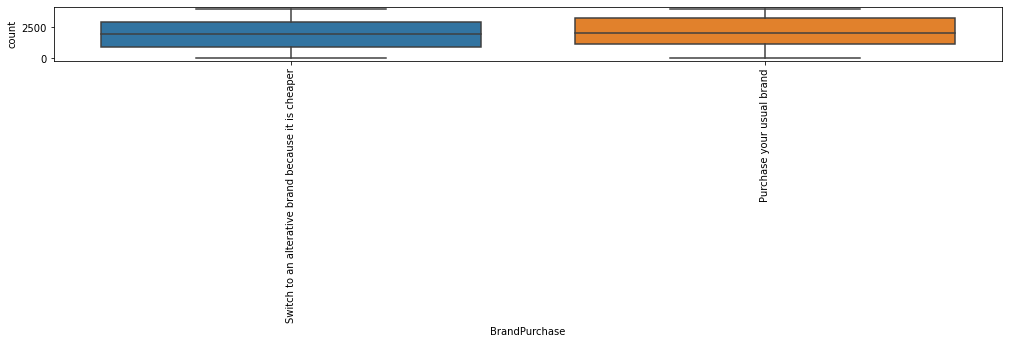

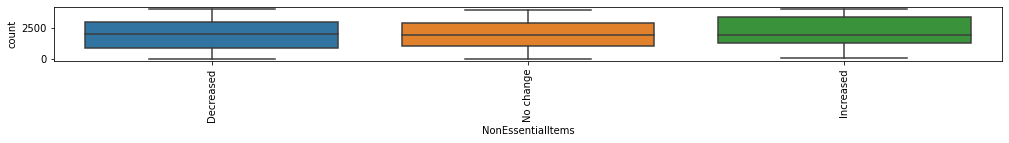

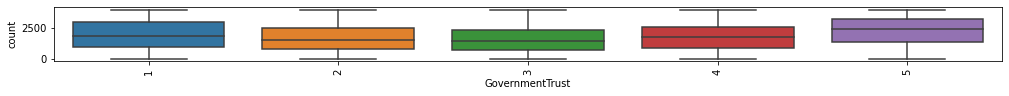

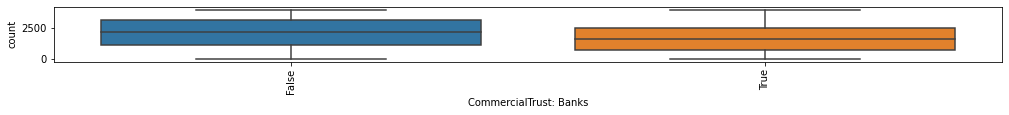

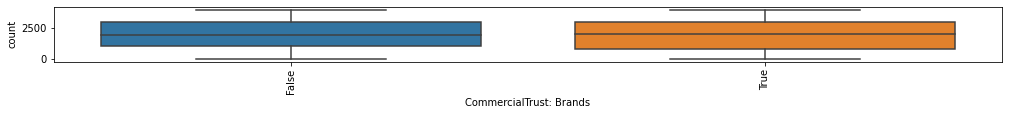

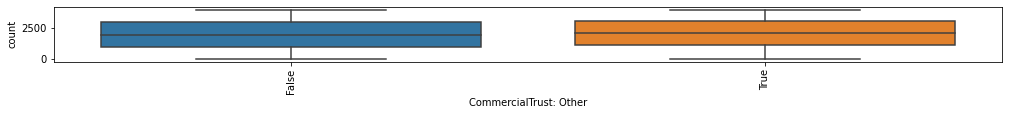

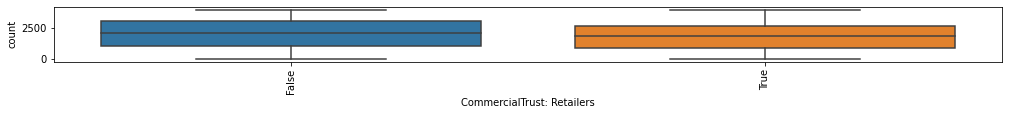

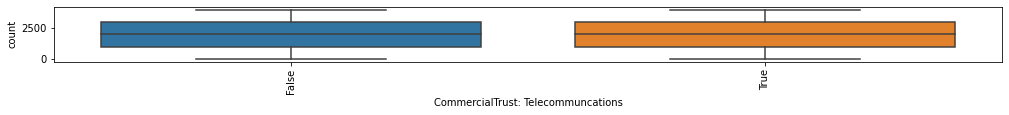

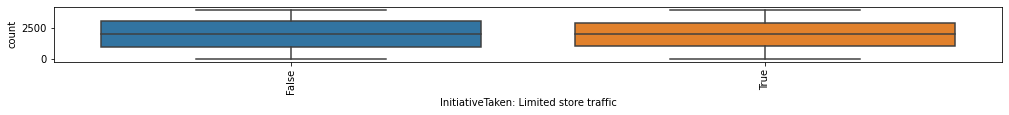

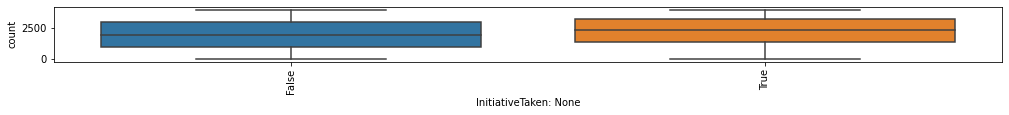

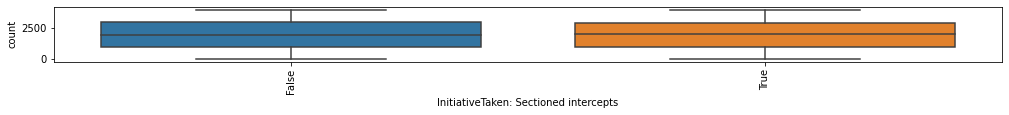

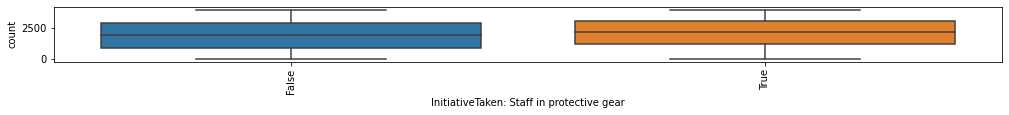

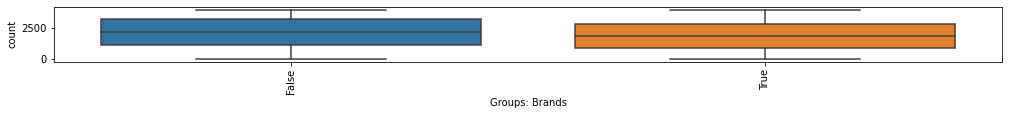

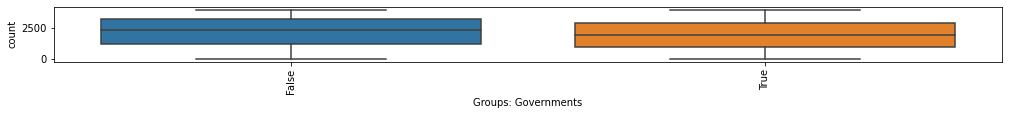

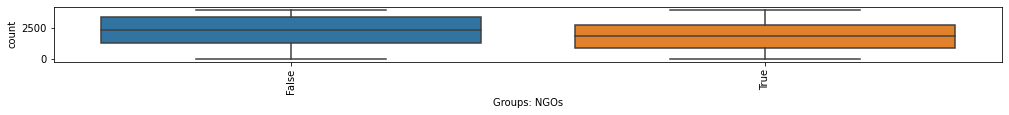

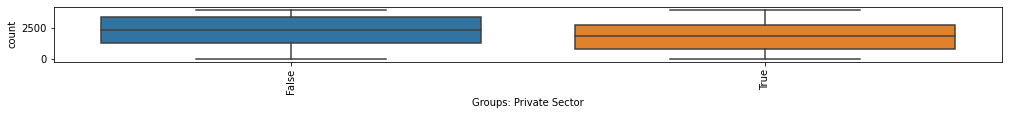

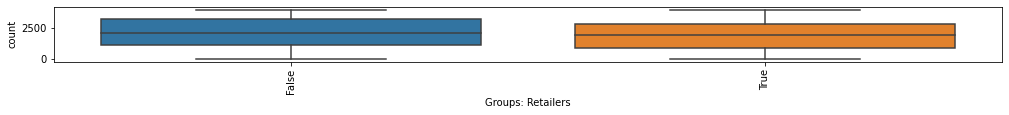

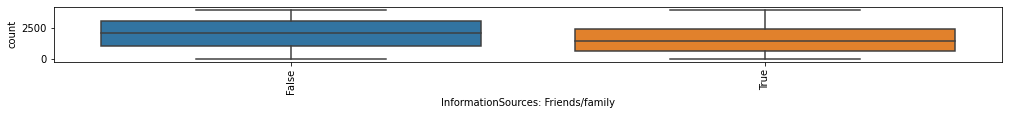

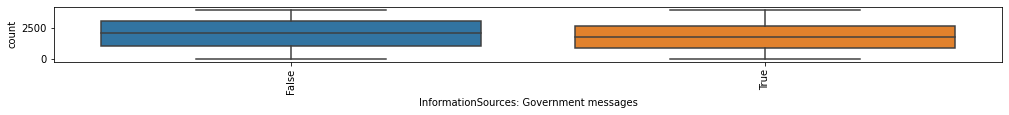

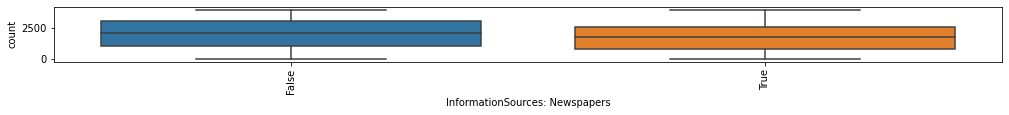

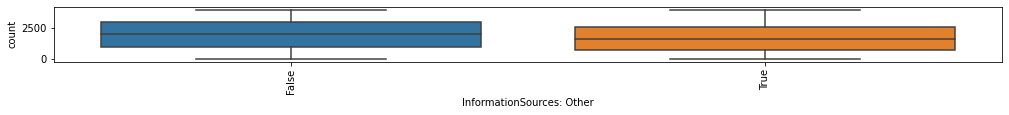

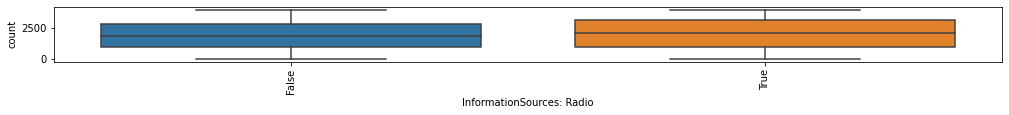

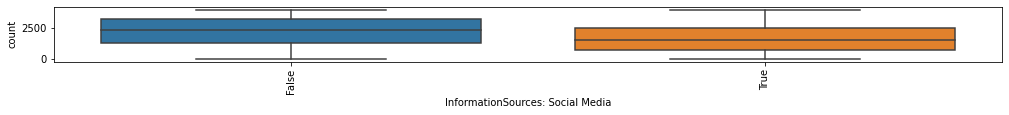

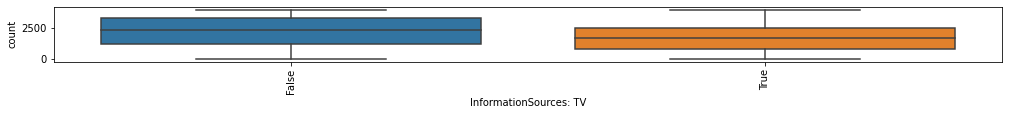

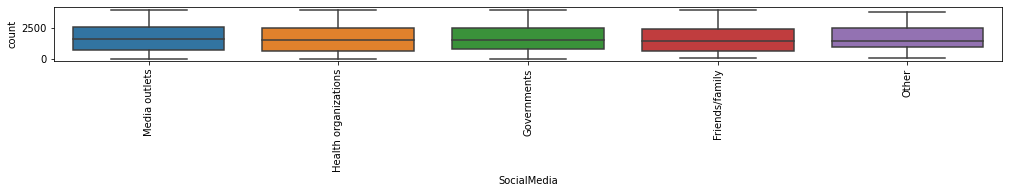

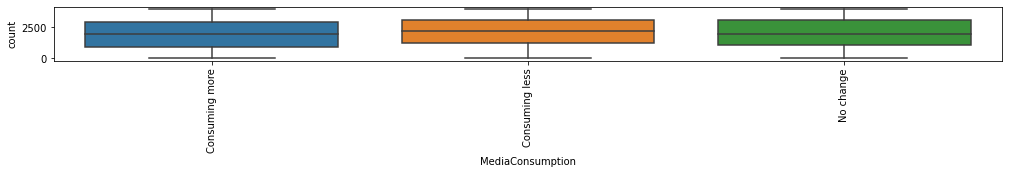

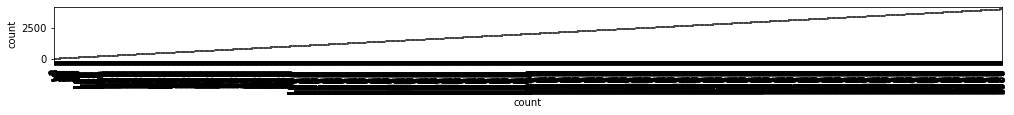

In [19]:
for column in new_rawData:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=new_rawData, x=column, y=new_rawData['count'])
        plt.xticks(rotation=90)

In [20]:
#create a function to find outliers using IQR
# n = 1
# colNo = 1
# while colNo < len(new_rawData.columns):
#     print(new_rawData.columns[colNo])
#     print("-----------------------------------------------------------------------------")
#     for (new_rowName, data) in new_rawData.iterrows():
#         print(data[n])
#         q1 = int(data[n]).quantile(0.25)
#         q3 = int(data[n]).quantile(0.75)
#         IQR = q3 - q1
#         outliers = data[((data[n]<(q1-1.5*IQR)) | (data[n]>(q3+1.5*IQR)))]
#         print("number of outliers: " + str(len(outliers)))
#         print("max outlier value: " + str(outliers.max()))
#         print("min outlier value: " + str(outliers.min()))
#     n = n + 1
#     print("------------------------------------------------------------------------------\n\n")
#     colNo = colNo + 1

In [21]:
new_rawData = new_rawData.drop(labels='count', axis=1)
new_rawData.head()

Survey Date  Country Gender Age Group SEC      Age       BirthYear  \
0  2020-04-02    Kenya   Male     15-25   B  20 - 29  1995 and above   
1  2020-04-02    Kenya   Male     26-35  C1  20 - 29     1984 - 1994   
2  2020-04-02  Nigeria   Male     15-25   A  20 - 29  1995 and above   
3  2020-04-02    Kenya   Male     26-35  C1  30 - 39     1984 - 1994   
4  2020-04-02    Kenya   Male     15-25   B  20 - 29             NaN   

  Awareness Urban/Rural  LevelConcern  ... Groups: Retailers  \
0       Yes  Rural area             5  ...             False   
1       Yes  Urban area             5  ...              True   
2       Yes  Urban area             5  ...             False   
3       Yes  Rural area             5  ...              True   
4       Yes  Rural area             5  ...             False   

  InformationSources: Friends/family InformationSources: Government messages  \
0                              False                                    True   
1                              False                                    True   
2                              False                                   False   
3                              False                                    True   
4                              False                                   False   

  InformationSources: Newspapers  InformationSources: Other  \
0                          False                      False   
1                          False                      False   
2                          False                      False   
3                           True                      False   
4                          False                      False   

   InformationSources: Radio  InformationSources: Social Media  \
0                      False                             False   
1                      False                              True   
2                      False                              True   
3                       True                              True   
4                      False                              True   

   InformationSources: TV           SocialMedia MediaConsumption  
0                   False                   NaN   Consuming more  
1                    True         Media outlets   Consuming more  
2                   False  Health organizations   Consuming more  
3                    True  Health organizations   Consuming more  
4                   False         Media outlets   Consuming less  

[5 rows x 55 columns]

<h3>Converted the dataset to csv</h3>

In [22]:
new_rawData.to_csv("DataSet/AfterVisualization.csv")

<h2>Preprocessing Stage</h2>
<ol>
    <li>Handling missing values</li>
    <li>Fixing Outliers</li>
    <li>Conversion from Categorical to numerical Values</li>
</ol>

<h3>Handling Missing Values</h3>

In [23]:
new_rawData1 = new_rawData.drop(["FoodLocations2"], axis=1)

<h3> Handling the last missing value column because it is our target variable </h3>
<p>In multivariate statistics and machine learning, the dependent variable is assigned a role as target variable. <br>
we will be maing use of “Label Encoder” because we are working with Dependent Categorical Column.</p>

In [24]:
from sklearn.preprocessing import LabelEncoder

leBp = LabelEncoder()
brandPurchase = leBp.fit_transform(new_rawData1['BrandPurchase'])

print(brandPurchase)
print(len(brandPurchase))
print(type(brandPurchase))

[1 2 2 ... 2 0 0]
3988
<class 'numpy.ndarray'>


In [142]:
colRow = 0
new_bpTrain = pd.DataFrame(columns=['BrandPurchase'], index=new_rawData1.index, data = new_rawData1)

print(len(brandPurchase))
while colRow < len(brandPurchase):
    if brandPurchase[colRow] == 1:
        new_bpTrain.iloc[colRow] = brandPurchase[colRow]
    elif brandPurchase[colRow] == 0:
        new_bpTrain.iloc[colRow] = brandPurchase[colRow]
    elif brandPurchase[colRow] == "NaN":
        new_bpTrain_dropped = new_bpTrain.dropna(axis=0)
    colRow = colRow + 1
print(new_bpTrain_dropped)

3988
                  BrandPurchase
0                             1
3                             1
4                             1
5                             1
6                             1
...                         ...
3982                          0
3983                          1
3984                          0
3986  Purchase your usual brand
3987  Purchase your usual brand

[3180 rows x 1 columns]


In [280]:
new_bpTest = pd.DataFrame(columns=['BrandPurchase'], index=new_rawData1.index, data = new_rawData1)
new_bpTest = new_bpTest[new_bpTest["BrandPurchase"].isna()]
print(new_bpTest)

     BrandPurchase
1              NaN
2              NaN
7              NaN
18             NaN
29             NaN
...            ...
3963           NaN
3970           NaN
3972           NaN
3981           NaN
3985           NaN

[808 rows x 1 columns]


In [334]:
x_train = new_bpTrain_dropped.iloc[:1590, 0]
y_train = new_bpTrain_dropped.iloc[1590:, 0]
print(type(x_train), type(y_train))
print(x_train.shape, y_train.shape)
print(y_train)

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
(1590,) (1590,)
2020    1
2022    0
2023    1
2024    1
2025    0
       ..
3982    0
3983    1
3984    0
3986    0
3987    0
Name: BrandPurchase, Length: 1590, dtype: object


In [335]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

x_trainArr = x_train.values
x_reshaped = x_trainArr.reshape(1, -1)

y_trainArr = y_train.values
y_reshaped = y_trainArr.reshape(1, -1)

print(type(x_reshaped), type(y_reshaped))
print(x_reshaped.shape, y_reshaped.shape)
print(x_reshaped, y_reshaped)
lr.fit(x_reshaped, y_reshaped)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(1, 1590) (1, 1590)
[[1 1 1 ... 1 1 1]] [[1 0 1 ... 0 0 0]]


ValueError: y should be a 1d array, got an array of shape (1, 1590) instead.

### 

In [281]:
# new_bpTrain_Dropped.to_csv("DataSet/Dropped.csv")
# new_bpTest.to_csv("DataSet/test.csv")

In [26]:
# from sklearn.linear_model import LinearRegression
# bpData = new_rawData1['BrandPurchase']
# bpData = [2 if x == "Switch to an alternative brand because it is cheaper" elif x == "Purchase your usual brand" else 0 for x in bpData]

# test_data = bpData.isnull()
# bpData.dropna(inplace=True)


In [27]:
# print(len(new_rawData1.columns))
# print(len(new_rawData1.index))
# print(new_rawData1.columns)

In [28]:
# new_rawData1.isna().sum()